In [1]:
# Import pandas
import pandas as pd
import numpy as np
import pandas_profiling
from scipy.stats import mode
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from nltk.corpus import stopwords
stop = stopwords.words('english')


from sklearn.metrics.pairwise import cosine_similarity


from sklearn.feature_extraction.text import TfidfVectorizer


from scipy.spatial.distance import cosine


import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from gensim import utils
from gensim.models import Doc2Vec



from sklearn.preprocessing import LabelEncoder #For assigning unique integer value to a catogeries
from sklearn.preprocessing import OneHotEncoder #For creating columns for all 

#SMOTE Libraries
from imblearn.over_sampling import SMOTE

#ADASYN Libraries 
from imblearn.over_sampling import ADASYN


from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef,f1_score

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import plot_tree
from xgboost import plot_tree,plot_importance
from sklearn import tree

from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from yellowbrick.model_selection import FeatureImportances,learning_curve,LearningCurve
from yellowbrick.target import class_balance
import itertools
from sklearn.model_selection import StratifiedKFold, KFold

from imblearn.over_sampling import SMOTE,BorderlineSMOTE,KMeansSMOTE

### Data Exploration

In [2]:
df = pd.read_excel("/Users/arvind.pawar/OneDrive - Brado/Desktop/Merck Manual Project/Data for ML with aherf data.xlsx")

In [3]:
df.head()

query result_topic result_type               domain  \
0     abdominal abscesses      Organic     Organic         docpanel.com   
1     abdominal abscesses      Organic     Organic     cedars-sinai.org   
2  abdominal wall defects      Organic     Organic  aappublications.org   
3  abdominal wall defects      Organic     Organic  aappublications.org   
4  abdominal wall defects      Organic     Organic  columbiadoctors.org   

                                          sub_domain  position  \
0  https://www.docpanel.com/blog/post/abdominal-a...         6   
1  https://www.cedars-sinai.org/health-library/di...         7   
2  https://neoreviews.aappublications.org/content...         4   
3  https://pedsinreview.aappublications.org/conte...         5   
4  https://www.columbiadoctors.org/treatments-con...         9   

   number_of_results  wtd_count  date  hour_of_day  scrape_geo  \
0                  9   0.111111   NaN          NaN         NaN   
1                  9   0.111111   NaN          NaN         NaN   
2                  9   0.111111   NaN          NaN         NaN   
3                  9   0.111111   NaN          NaN         NaN   
4                  9   0.111111   NaN          NaN         NaN   

                                               title desc  CPC  Search Volume  \
0  Abdominal Abscess: Diagnosis, Causes & More - ...  NaN  0.0           2400   
1             Intra-Abdominal Abscess | Cedars-Sinai  NaN  0.0           2400   
2  Abdominal Wall Defects | American Academy of P...  NaN  0.0            260   
3  Ventral Abdominal Wall Defects | American Acad...  NaN  0.0            260   
4  ‚ÄãAbdominal Wall Defects (Pediatric) | Columb...  NaN  0.0            260   

   Competition                                               URLs  \
0         0.01  https://www.docpanel.com/blog/post/abdominal-a...   
1         0.01  https://www.cedars-sinai.org/health-library/di...   
2         0.01  https://neoreviews.aappublications.org/content...   
3         0.01  https://pedsinreview.aappublications.org/conte...   
4         0.01  https://www.columbiadoctors.org/treatments-con...   

                                            meta_tag  \
0  {'og:url': 'https://www.docpanel.com/blog/post...   
1  {'og:locale': 'en US', 'og:type': 'website', '...   
2  {'article:published_time': '2020 06 01', 'arti...   
3  {'article:published_time': '2019 12 01', 'arti...   
4  {'og:site_name': 'ColumbiaDoctors', 'og:type':...   

                                      link_canonical  \
0                                                  0   
1                                                  0   
2  https://neoreviews.aappublications.org/content...   
3  https://pedsinreview.aappublications.org/conte...   
4  https://www.columbiadoctors.org/treatments-con...   

                                             title.1  \
0          Abdominal Abscess: Diagnosis, Causes More   
1               Intra Abdominal Abscess Cedars Sinai   
2  Abdominal Wall Defects American Academy of Ped...   
3  Ventral Abdominal Wall Defects American Academ...   
4  Abdominal Wall Defects (Pediatric) ColumbiaDoc...   

                                           meta_desc  \
0  An abdominal abscess is a pocket of pus or inf...   
1  An intra abdominal abscess is a collection of ...   
2  The 2 most common congenital abdominal wall de...   
3  1. Sara A. Mansfield, MD, MS* 2. Tim Jancelewi...   
4  What are abdominal wall defects? Abdominal wal...   

                                            headings  \
0  ['Abdominal Abscess: Diagnosis, Causes More', ...   
1  ['Intra Abdominal Abscess', 'What is an intra ...   
2  ['Main menu', 'User menu', 'Search', 'Abdomina...   
3  ['Main menu', 'User menu', 'Search', 'Ventral ...   
4  ['Our website uses cookies', 'ColumbiaDoctors'...   

                                            img_alts  \
0  ['DocPanel', 'Facebook', 'Twitter', 'Tumblr', ...   
1  ['Cedars Sinai', 'Cedars Sinai Medical Center'...   
2  ['American Academ

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7106 entries, 0 to 7105
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   query                     7106 non-null   object 
 1   result_topic              7106 non-null   object 
 2   result_type               7106 non-null   object 
 3   domain                    7106 non-null   object 
 4   sub_domain                7100 non-null   object 
 5   position                  7106 non-null   int64  
 6   number_of_results         7106 non-null   int64  
 7   wtd_count                 7106 non-null   float64
 8   date                      0 non-null      float64
 9   hour_of_day               0 non-null      float64
 10  scrape_geo                0 non-null      float64
 11  title                     7106 non-null   object 
 12  desc                      15 non-null     object 
 13  CPC                       7106 non-null   float64
 14  Search V

In [5]:
df.isnull().sum()

query                          0
result_topic                   0
result_type                    0
domain                         0
sub_domain                     6
position                       0
number_of_results              0
wtd_count                      0
date                        7106
hour_of_day                 7106
scrape_geo                  7106
title                          0
desc                        7091
CPC                            0
Search Volume                  0
Competition                    0
URLs                          20
meta_tag                      20
link_canonical                20
title.1                       20
meta_desc                     20
headings                      20
img_alts                      20
texts                         20
links                         20
links_texts                   20
structured_data               20
Domain from aherf              0
Domain Rating                  0
Ref domains Dofollow           0
Ref domain

#### Clean Title

In [6]:
df['cleaned_title']=df['title'].str.replace('[,,|,?,:,-]', '')
df['cleaned_title']=df['cleaned_title'].str.replace('[(,)]', '')
df['cleaned_title']=df['cleaned_title'].str.lower()

#### Clean Meta Description

In [7]:
df['processed_meta_desc']=df['meta_desc'].str.replace('[,]', '')
df['cleaned_meta_desc']=df['processed_meta_desc'].astype('str').apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#### Clean Texts

In [8]:
df['processed_texts']=df['texts'].str.replace('[:]', ' ')

df['processed_texts']=df['processed_texts'].str.replace('[.,,]', '')

df['processed_texts']=df['processed_texts'].str.replace('"', '')

df['processed_texts']=df['processed_texts'].str.replace("'", '')

df['processed_texts']=df['processed_texts'].str.replace("[", '')

df['processed_texts']=df['processed_texts'].str.replace("]", '')

df['processed_texts']

0       8562427343 For Patients For Healthcare Provide...
1       Skip to content Menu Close Call 1 800 CEDARS 1...
2       Skip to main content Advertising Disclaimer Ma...
3       Skip to main content Advertising Disclaimer Ma...
4       Skip to site alert Skip to content Our website...
5       Skip to main content Advertising Disclaimer Ma...
6       Skip directly to site content Skip directly to...
7       Skip to content Close Select your preferred la...
8                                                     NaN
9       Now scheduling COVID 19 vaccine appointments f...
10      Advertisement AAFP AAFP AAFP Foundation Founda...
11      Advertisement AAFPAAFPAAFP FoundationFoundatio...
12      Now scheduling COVID 19 vaccine appointments f...
13      Register Login Search Search Chatroom New Word...
14      Close Healthy Living Next Healthy Teens Health...
15      Now scheduling COVID 19 vaccine appointments f...
16      Advertisement AAFPAAFPAAFP FoundationFoundatio...
17      Close 

In [9]:
df['cleaned_texts']=df['processed_texts'].astype('str').apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [10]:
df.head(2)

query result_topic result_type            domain  \
0  abdominal abscesses      Organic     Organic      docpanel.com   
1  abdominal abscesses      Organic     Organic  cedars-sinai.org   

                                          sub_domain  position  \
0  https://www.docpanel.com/blog/post/abdominal-a...         6   
1  https://www.cedars-sinai.org/health-library/di...         7   

   number_of_results  wtd_count  date  hour_of_day  scrape_geo  \
0                  9   0.111111   NaN          NaN         NaN   
1                  9   0.111111   NaN          NaN         NaN   

                                               title desc  CPC  Search Volume  \
0  Abdominal Abscess: Diagnosis, Causes & More - ...  NaN  0.0           2400   
1             Intra-Abdominal Abscess | Cedars-Sinai  NaN  0.0           2400   

   Competition                                               URLs  \
0         0.01  https://www.docpanel.com/blog/post/abdominal-a...   
1         0.01  https://www.cedars-sinai.org/health-library/di...   

                                            meta_tag link_canonical  \
0  {'og:url': 'https://www.docpanel.com/blog/post...              0   
1  {'og:locale': 'en US', 'og:type': 'website', '...              0   

                                     title.1  \
0  Abdominal Abscess: Diagnosis, Causes More   
1       Intra Abdominal Abscess Cedars Sinai   

                                           meta_desc  \
0  An abdominal abscess is a pocket of pus or inf...   
1  An intra abdominal abscess is a collection of ...   

                                            headings  \
0  ['Abdominal Abscess: Diagnosis, Causes More', ...   
1  ['Intra Abdominal Abscess', 'What is an intra ...   

                                            img_alts  \
0  ['DocPanel', 'Facebook', 'Twitter', 'Tumblr', ...   
1  ['Cedars Sinai', 'Cedars Sinai Medical Center'...   

                                               texts  \
0  ['856.242.7343 For Patients For Healthcare Pro...   
1  ['Skip to content', "Menu Close Call 1 800 CED...   

                                               links  \
0                          ['https://www.hyped.com']   
1  ['https://www.mycslink.org#feature-bills', 'ht...   

                                         links_texts  \
0  ['856.242.7343', 'For Patients', 'For Healthca...   
1  ['Skip to content', 'Menu', 'Close', 'Call 1 8...   

                   structured_data Domain from aherf  Domain Rating  \
0  {'found': 'N', 'content': None}      docpanel.com           31.0   
1  {'found': 'N', 'content': None}  cedars-sinai.org           79.0   

   Ref domains Dofollow  Ref domains Governmental  Ref domains Educational  \
0                     7                         0                        0   
1                   446                         2                        0   

   Linked Domains  Total Backlinks  Backlinks Image  Backlinks Educational  \
0               0              128               16                      0   
1               0            48999               52                      0   

   Total Keywords  Total Traffic  \
0               0              0   
1               0              0   

                                       cleaned_title  \
0  abdominal abscess diagnosis causes & more  doc...   
1                intraabdominal abscess  cedarssinai   

                                 processed_meta_desc  \
0  An abdominal abscess is a pocket of pus or inf...   
1  An intra abdominal abscess is a collection of ...   

                                   cleaned_meta_desc  \
0  An abdominal abscess pocket pus infected fluid...   
1  An intra abdominal abscess collection pus infe...   

                                     processed_texts  \
0  8562427343 For Patients For Healthcare Provide...   
1  Skip to content Menu Close Call 1 800 CEDARS 1...   

                                       cleaned_texts  
0  8562427343 For Patients For Healthcare Provide...  
1  Skip

#### keyword title similairity

In [11]:
vectorizer = TfidfVectorizer()
def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

In [12]:
keywords=df['query'].astype('unicode')

In [13]:
title=df['cleaned_title'].astype('unicode')

In [14]:
Tfidf_scores = []

def get_sim_scores(text1, text2):
    for i in range(len(keywords)):
        score = cosine_sim(text1[i],text2[i])
        Tfidf_scores.append(score)
        
get_sim_scores(keywords, title)

cosine_sim_KW_Title=pd.DataFrame(Tfidf_scores)

cosine_sim_KW_Title.columns = ['cosine_sim_KW_Title']

new_df=pd.concat([df, cosine_sim_KW_Title], axis = 1)

In [15]:
new_df.head(2)

query result_topic result_type            domain  \
0  abdominal abscesses      Organic     Organic      docpanel.com   
1  abdominal abscesses      Organic     Organic  cedars-sinai.org   

                                          sub_domain  position  \
0  https://www.docpanel.com/blog/post/abdominal-a...         6   
1  https://www.cedars-sinai.org/health-library/di...         7   

   number_of_results  wtd_count  date  hour_of_day  scrape_geo  \
0                  9   0.111111   NaN          NaN         NaN   
1                  9   0.111111   NaN          NaN         NaN   

                                               title desc  CPC  Search Volume  \
0  Abdominal Abscess: Diagnosis, Causes & More - ...  NaN  0.0           2400   
1             Intra-Abdominal Abscess | Cedars-Sinai  NaN  0.0           2400   

   Competition                                               URLs  \
0         0.01  https://www.docpanel.com/blog/post/abdominal-a...   
1         0.01  https://www.cedars-sinai.org/health-library/di...   

                                            meta_tag link_canonical  \
0  {'og:url': 'https://www.docpanel.com/blog/post...              0   
1  {'og:locale': 'en US', 'og:type': 'website', '...              0   

                                     title.1  \
0  Abdominal Abscess: Diagnosis, Causes More   
1       Intra Abdominal Abscess Cedars Sinai   

                                           meta_desc  \
0  An abdominal abscess is a pocket of pus or inf...   
1  An intra abdominal abscess is a collection of ...   

                                            headings  \
0  ['Abdominal Abscess: Diagnosis, Causes More', ...   
1  ['Intra Abdominal Abscess', 'What is an intra ...   

                                            img_alts  \
0  ['DocPanel', 'Facebook', 'Twitter', 'Tumblr', ...   
1  ['Cedars Sinai', 'Cedars Sinai Medical Center'...   

                                               texts  \
0  ['856.242.7343 For Patients For Healthcare Pro...   
1  ['Skip to content', "Menu Close Call 1 800 CED...   

                                               links  \
0                          ['https://www.hyped.com']   
1  ['https://www.mycslink.org#feature-bills', 'ht...   

                                         links_texts  \
0  ['856.242.7343', 'For Patients', 'For Healthca...   
1  ['Skip to content', 'Menu', 'Close', 'Call 1 8...   

                   structured_data Domain from aherf  Domain Rating  \
0  {'found': 'N', 'content': None}      docpanel.com           31.0   
1  {'found': 'N', 'content': None}  cedars-sinai.org           79.0   

   Ref domains Dofollow  Ref domains Governmental  Ref domains Educational  \
0                     7                         0                        0   
1                   446                         2                        0   

   Linked Domains  Total Backlinks  Backlinks Image  Backlinks Educational  \
0               0              128               16                      0   
1               0            48999               52                      0   

   Total Keywords  Total Traffic  \
0               0              0   
1               0              0   

                                       cleaned_title  \
0  abdominal abscess diagnosis causes & more  doc...   
1                intraabdominal abscess  cedarssinai   

                                 processed_meta_desc  \
0  An abdominal abscess is a pocket of pus or inf...   
1  An intra abdominal abscess is a collection of ...   

                                   cleaned_meta_desc  \
0  An abdominal abscess pocket pus infected fluid...   
1  An intra abdominal abscess collection pus infe...   

                                     processed_texts  \
0  8562427343 For Patients For Healthcare Provide...   
1  Skip to content Menu Close Call 1 800 CEDARS 1...   

                                       cleaned_texts  cosine_sim_KW_Title  
0  8562427343 For Patients For Healthcare

#### Keyword meta description similarity

In [16]:
meta_desc=new_df['cleaned_meta_desc']

Tfidf_scores = []

get_sim_scores(keywords, meta_desc)

cosine_sim_KW_meta=pd.DataFrame(Tfidf_scores)

cosine_sim_KW_meta.columns = ['cosine_sim_KW_meta']

new_df=pd.concat([new_df, cosine_sim_KW_meta], axis = 1)

In [17]:
new_df.head(2)

query result_topic result_type            domain  \
0  abdominal abscesses      Organic     Organic      docpanel.com   
1  abdominal abscesses      Organic     Organic  cedars-sinai.org   

                                          sub_domain  position  \
0  https://www.docpanel.com/blog/post/abdominal-a...         6   
1  https://www.cedars-sinai.org/health-library/di...         7   

   number_of_results  wtd_count  date  hour_of_day  scrape_geo  \
0                  9   0.111111   NaN          NaN         NaN   
1                  9   0.111111   NaN          NaN         NaN   

                                               title desc  CPC  Search Volume  \
0  Abdominal Abscess: Diagnosis, Causes & More - ...  NaN  0.0           2400   
1             Intra-Abdominal Abscess | Cedars-Sinai  NaN  0.0           2400   

   Competition                                               URLs  \
0         0.01  https://www.docpanel.com/blog/post/abdominal-a...   
1         0.01  https://www.cedars-sinai.org/health-library/di...   

                                            meta_tag link_canonical  \
0  {'og:url': 'https://www.docpanel.com/blog/post...              0   
1  {'og:locale': 'en US', 'og:type': 'website', '...              0   

                                     title.1  \
0  Abdominal Abscess: Diagnosis, Causes More   
1       Intra Abdominal Abscess Cedars Sinai   

                                           meta_desc  \
0  An abdominal abscess is a pocket of pus or inf...   
1  An intra abdominal abscess is a collection of ...   

                                            headings  \
0  ['Abdominal Abscess: Diagnosis, Causes More', ...   
1  ['Intra Abdominal Abscess', 'What is an intra ...   

                                            img_alts  \
0  ['DocPanel', 'Facebook', 'Twitter', 'Tumblr', ...   
1  ['Cedars Sinai', 'Cedars Sinai Medical Center'...   

                                               texts  \
0  ['856.242.7343 For Patients For Healthcare Pro...   
1  ['Skip to content', "Menu Close Call 1 800 CED...   

                                               links  \
0                          ['https://www.hyped.com']   
1  ['https://www.mycslink.org#feature-bills', 'ht...   

                                         links_texts  \
0  ['856.242.7343', 'For Patients', 'For Healthca...   
1  ['Skip to content', 'Menu', 'Close', 'Call 1 8...   

                   structured_data Domain from aherf  Domain Rating  \
0  {'found': 'N', 'content': None}      docpanel.com           31.0   
1  {'found': 'N', 'content': None}  cedars-sinai.org           79.0   

   Ref domains Dofollow  Ref domains Governmental  Ref domains Educational  \
0                     7                         0                        0   
1                   446                         2                        0   

   Linked Domains  Total Backlinks  Backlinks Image  Backlinks Educational  \
0               0              128               16                      0   
1               0            48999               52                      0   

   Total Keywords  Total Traffic  \
0               0              0   
1               0              0   

                                       cleaned_title  \
0  abdominal abscess diagnosis causes & more  doc...   
1                intraabdominal abscess  cedarssinai   

                                 processed_meta_desc  \
0  An abdominal abscess is a pocket of pus or inf...   
1  An intra abdominal abscess is a collection of ...   

                                   cleaned_meta_desc  \
0  An abdominal abscess pocket pus infected fluid...   
1  An intra abdominal abscess collection pus infe...   

                                     processed_texts  \
0  8562427343 For Patients For Healthcare Provide...   
1  Skip to content Menu Close Call 1 800 CEDARS 1...   

                                       cleaned_texts  cosine_sim_KW_Title  \
0  8562427343 For Patients For Healthcar

#### Keyword texts similarity

In [18]:
texts=new_df['cleaned_texts']
Tfidf_scores = []
get_sim_scores(keywords, texts)

cosine_sim_KW_texts=pd.DataFrame(Tfidf_scores)
cosine_sim_KW_texts.columns = ['cosine_sim_KW_texts']

new_df=pd.concat([new_df, cosine_sim_KW_texts], axis = 1)


In [19]:
new_df.head(2)

query result_topic result_type            domain  \
0  abdominal abscesses      Organic     Organic      docpanel.com   
1  abdominal abscesses      Organic     Organic  cedars-sinai.org   

                                          sub_domain  position  \
0  https://www.docpanel.com/blog/post/abdominal-a...         6   
1  https://www.cedars-sinai.org/health-library/di...         7   

   number_of_results  wtd_count  date  hour_of_day  scrape_geo  \
0                  9   0.111111   NaN          NaN         NaN   
1                  9   0.111111   NaN          NaN         NaN   

                                               title desc  CPC  Search Volume  \
0  Abdominal Abscess: Diagnosis, Causes & More - ...  NaN  0.0           2400   
1             Intra-Abdominal Abscess | Cedars-Sinai  NaN  0.0           2400   

   Competition                                               URLs  \
0         0.01  https://www.docpanel.com/blog/post/abdominal-a...   
1         0.01  https://www.cedars-sinai.org/health-library/di...   

                                            meta_tag link_canonical  \
0  {'og:url': 'https://www.docpanel.com/blog/post...              0   
1  {'og:locale': 'en US', 'og:type': 'website', '...              0   

                                     title.1  \
0  Abdominal Abscess: Diagnosis, Causes More   
1       Intra Abdominal Abscess Cedars Sinai   

                                           meta_desc  \
0  An abdominal abscess is a pocket of pus or inf...   
1  An intra abdominal abscess is a collection of ...   

                                            headings  \
0  ['Abdominal Abscess: Diagnosis, Causes More', ...   
1  ['Intra Abdominal Abscess', 'What is an intra ...   

                                            img_alts  \
0  ['DocPanel', 'Facebook', 'Twitter', 'Tumblr', ...   
1  ['Cedars Sinai', 'Cedars Sinai Medical Center'...   

                                               texts  \
0  ['856.242.7343 For Patients For Healthcare Pro...   
1  ['Skip to content', "Menu Close Call 1 800 CED...   

                                               links  \
0                          ['https://www.hyped.com']   
1  ['https://www.mycslink.org#feature-bills', 'ht...   

                                         links_texts  \
0  ['856.242.7343', 'For Patients', 'For Healthca...   
1  ['Skip to content', 'Menu', 'Close', 'Call 1 8...   

                   structured_data Domain from aherf  Domain Rating  \
0  {'found': 'N', 'content': None}      docpanel.com           31.0   
1  {'found': 'N', 'content': None}  cedars-sinai.org           79.0   

   Ref domains Dofollow  Ref domains Governmental  Ref domains Educational  \
0                     7                         0                        0   
1                   446                         2                        0   

   Linked Domains  Total Backlinks  Backlinks Image  Backlinks Educational  \
0               0              128               16                      0   
1               0            48999               52                      0   

   Total Keywords  Total Traffic  \
0               0              0   
1               0              0   

                                       cleaned_title  \
0  abdominal abscess diagnosis causes & more  doc...   
1                intraabdominal abscess  cedarssinai   

                                 processed_meta_desc  \
0  An abdominal abscess is a pocket of pus or inf...   
1  An intra abdominal abscess is a collection of ...   

                                   cleaned_meta_desc  \
0  An abdominal abscess pocket pus infected fluid...   
1  An intra abdominal abscess collection pus infe...   

                                     processed_texts  \
0  8562427343 For Patients For Healthcare Provide...   
1  Skip to content Menu Close Call 1 800 CEDARS 1...   

                                       cleaned_texts  cosine_sim_KW_Title  \
0  8562427343 For Patients For Healthcar

#### Number of Links

In [20]:
#new_df['links']

In [21]:
new_df['no_of_links']=new_df['links'].str.count("http|https")

#### Number of Questions

In [22]:
new_df['no_of_questions']=new_df['cleaned_texts'].str.count("\\?")

#### Number of Words in Content

In [23]:
new_df['content_word_count']=new_df['cleaned_texts'].str.split().str.len()

#### Length of Keywords

In [24]:
new_df['len_of_keywords']=new_df['query'].str.split().str.len()

In [25]:
new_df.shape

(7106, 50)

In [26]:
# drop by Name
new_df = new_df.drop(['result_topic', 'result_type'], axis=1)

In [27]:
new_df.drop(['hour_of_day', 'scrape_geo'], axis=1, inplace=True)

In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7106 entries, 0 to 7105
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   query                     7106 non-null   object 
 1   domain                    7106 non-null   object 
 2   sub_domain                7100 non-null   object 
 3   position                  7106 non-null   int64  
 4   number_of_results         7106 non-null   int64  
 5   wtd_count                 7106 non-null   float64
 6   date                      0 non-null      float64
 7   title                     7106 non-null   object 
 8   desc                      15 non-null     object 
 9   CPC                       7106 non-null   float64
 10  Search Volume             7106 non-null   int64  
 11  Competition               7106 non-null   float64
 12  URLs                      7086 non-null   object 
 13  meta_tag                  7086 non-null   object 
 14  link_can

In [29]:
#file_name ='/Users/arvind.pawar/OneDrive - Brado/Desktop/Merck Manual Project/Cleaned_DataForML.xlsx'

#writer = pd.ExcelWriter(file_name, engine='xlsxwriter')

#new_df.to_excel(writer, index = False, header=True )

#writer.book.use_zip64()

#writer.save()

In [30]:
#new_df.to_csv('/Users/arvind.pawar/OneDrive - Brado/Desktop/Merck Manual Project/Cleaned_DataForML.csv')

In [31]:
#newdf_dummy=pd.get_dummies(new_df, columns=['result_topic', 'result_type'])

In [32]:
#newdf_dummy.info()

In [33]:
#newdf_dummy.drop(['hour_of_day', 'scrape_geo'], axis=1, inplace=True)

### Readability Score (Smog Index)

In [34]:
import textstat
readability_scores = []

def get_redability_score(text1):
    for i in range(len(text1)):
        score = textstat.smog_index(text1[i])
        readability_scores.append(score)
        
texts=new_df['cleaned_texts']
get_redability_score(texts)

readability_score_texts=pd.DataFrame(readability_scores)
readability_score_texts.columns = ['readability_score_texts']
new_df=pd.concat([new_df, readability_score_texts], axis = 1)

In [35]:
new_df.head(2)

query            domain  \
0  abdominal abscesses      docpanel.com   
1  abdominal abscesses  cedars-sinai.org   

                                          sub_domain  position  \
0  https://www.docpanel.com/blog/post/abdominal-a...         6   
1  https://www.cedars-sinai.org/health-library/di...         7   

   number_of_results  wtd_count  date  \
0                  9   0.111111   NaN   
1                  9   0.111111   NaN   

                                               title desc  CPC  Search Volume  \
0  Abdominal Abscess: Diagnosis, Causes & More - ...  NaN  0.0           2400   
1             Intra-Abdominal Abscess | Cedars-Sinai  NaN  0.0           2400   

   Competition                                               URLs  \
0         0.01  https://www.docpanel.com/blog/post/abdominal-a...   
1         0.01  https://www.cedars-sinai.org/health-library/di...   

                                            meta_tag link_canonical  \
0  {'og:url': 'https://www.docpanel.com/blog/post...              0   
1  {'og:locale': 'en US', 'og:type': 'website', '...              0   

                                     title.1  \
0  Abdominal Abscess: Diagnosis, Causes More   
1       Intra Abdominal Abscess Cedars Sinai   

                                           meta_desc  \
0  An abdominal abscess is a pocket of pus or inf...   
1  An intra abdominal abscess is a collection of ...   

                                            headings  \
0  ['Abdominal Abscess: Diagnosis, Causes More', ...   
1  ['Intra Abdominal Abscess', 'What is an intra ...   

                                            img_alts  \
0  ['DocPanel', 'Facebook', 'Twitter', 'Tumblr', ...   
1  ['Cedars Sinai', 'Cedars Sinai Medical Center'...   

                                               texts  \
0  ['856.242.7343 For Patients For Healthcare Pro...   
1  ['Skip to content', "Menu Close Call 1 800 CED...   

                                               links  \
0                          ['https://www.hyped.com']   
1  ['https://www.mycslink.org#feature-bills', 'ht...   

                                         links_texts  \
0  ['856.242.7343', 'For Patients', 'For Healthca...   
1  ['Skip to content', 'Menu', 'Close', 'Call 1 8...   

                   structured_data Domain from aherf  Domain Rating  \
0  {'found': 'N', 'content': None}      docpanel.com           31.0   
1  {'found': 'N', 'content': None}  cedars-sinai.org           79.0   

   Ref domains Dofollow  Ref domains Governmental  Ref domains Educational  \
0                     7                         0                        0   
1                   446                         2                        0   

   Linked Domains  Total Backlinks  Backlinks Image  Backlinks Educational  \
0               0              128               16                      0   
1               0            48999               52                      0   

   Total Keywords  Total Traffic  \
0               0              0   
1               0              0   

                                       cleaned_title  \
0  abdominal abscess diagnosis causes & more  doc...   
1                intraabdominal abscess  cedarssinai   

                                 processed_meta_desc  \
0  An abdominal abscess is a pocket of pus or inf...   
1  An intra abdominal abscess is a collection of ...   

                                   cleaned_meta_desc  \
0  An abdominal abscess pocket pus infected fluid...   
1  An intra abdominal abscess collection pus infe...   

                                     processed_texts  \
0  8562427343 For Patients For Healthcare Provide...   
1  Skip to content Menu Close Call 1 800 CEDARS 1...   

                                       cleaned_texts  cosine_sim_KW_Title  \
0  8562427343 For Patients For Healthcare Provide...             0.175786   
1  Skip content Menu Close Call 1 800 CEDARS 1 to...             0.000000   

   cosine_sim_KW_meta  cosine_sim_K

### Exploratory Data Analysis

<AxesSubplot:title={'center':'Boxplot for search volume and Kyeword-Title Similarity'}, xlabel='Domain Rating', ylabel='position'>

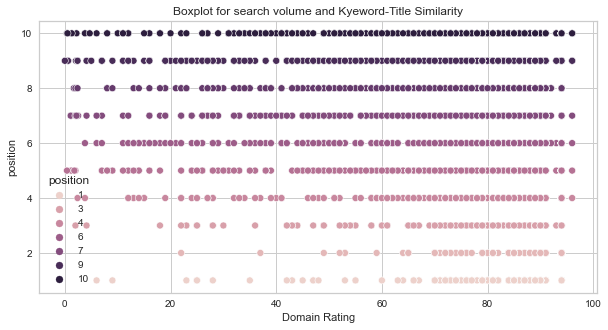

In [438]:
plt.figure(figsize=(10,5))
plt.title('Boxplot for search volume and Kyeword-Title Similarity')
sns.scatterplot(x="Domain Rating", y="position", hue='position',
            data=new_df)

<AxesSubplot:title={'center':'Boxplot for search volume and Kyeword-Title Similarity'}, xlabel='cosine_sim_KW_Title', ylabel='Search Volume'>

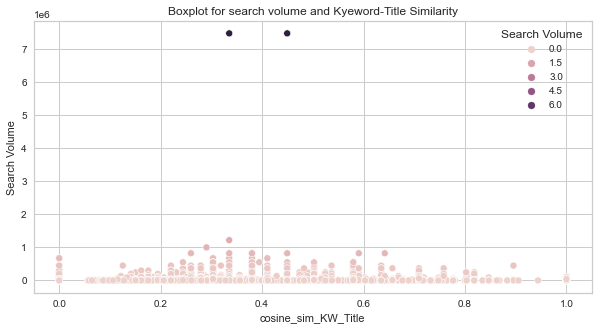

In [36]:
plt.figure(figsize=(10,5))
plt.title('Boxplot for search volume and Kyeword-Title Similarity')
sns.scatterplot(x="cosine_sim_KW_Title", y="Search Volume", hue='Search Volume',
            data=new_df)

<AxesSubplot:title={'center':'Boxplot for CPC and Kyeword-Title Similarity'}, xlabel='cosine_sim_KW_Title', ylabel='CPC'>

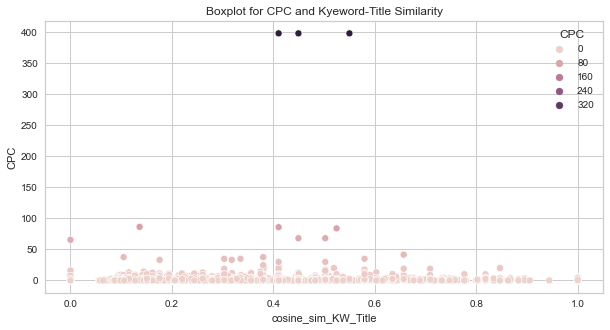

In [37]:
plt.figure(figsize=(10,5))
plt.title('Boxplot for CPC and Kyeword-Title Similarity')
sns.scatterplot(x="cosine_sim_KW_Title", y="CPC",hue='CPC',
            data=new_df)

<AxesSubplot:title={'center':'Boxplot for Competition and Kyeword-Title Similarity'}, xlabel='cosine_sim_KW_Title', ylabel='Competition'>

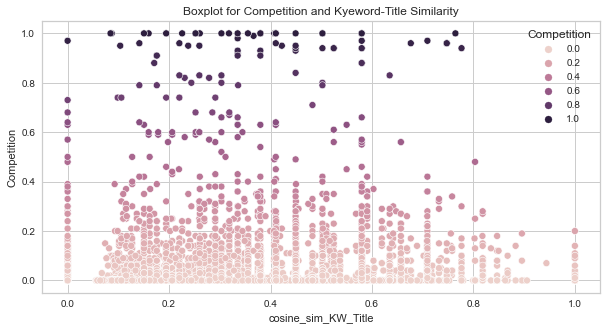

In [38]:
plt.figure(figsize=(10,5))
plt.title('Boxplot for Competition and Kyeword-Title Similarity')
sns.scatterplot(x="cosine_sim_KW_Title", y="Competition", hue='Competition',
            data=new_df)

<AxesSubplot:title={'center':'Boxplot for position and Kyeword-Title Similarity'}, xlabel='position', ylabel='cosine_sim_KW_Title'>

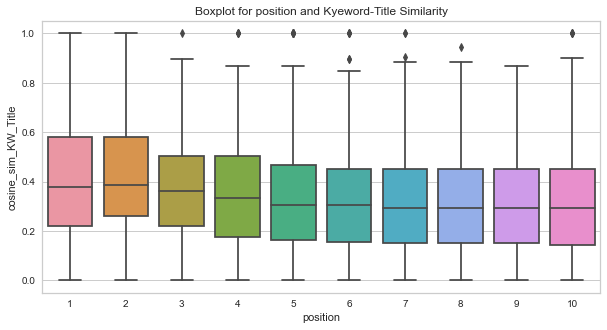

In [39]:
plt.figure(figsize=(10,5))
plt.title('Boxplot for position and Kyeword-Title Similarity')
sns.boxplot(x="position", y="cosine_sim_KW_Title",
            data=new_df)

In [40]:
new_df.drop(['date'], axis=1, inplace=True)

In [41]:
new_df.drop(['no_of_links', 'no_of_questions'], axis=1, inplace=True)

#### Correlation Matrices

In [42]:
matrix=new_df.corr()

In [43]:
mask = np.triu(np.ones_like(matrix, dtype=bool))

<AxesSubplot:title={'center':'Pearson Correlation'}>

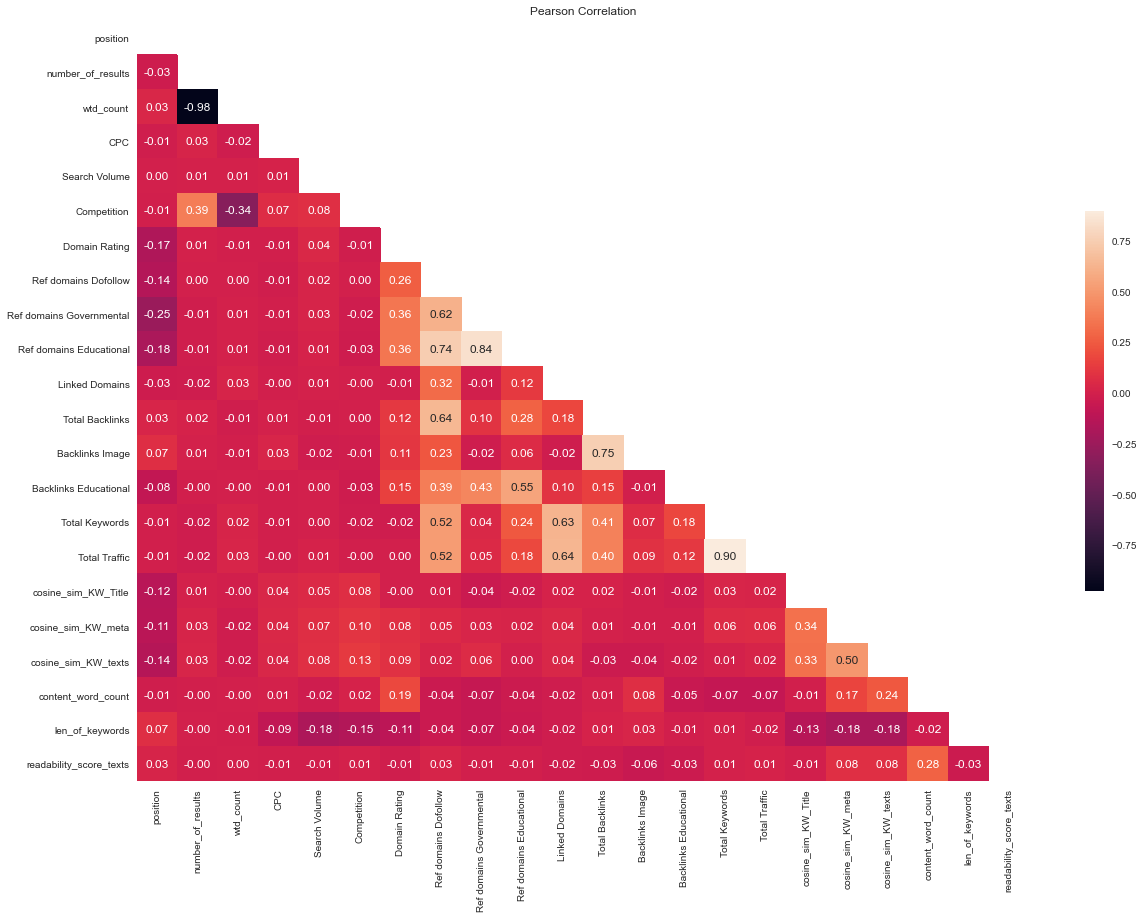

In [44]:
plt.figure(figsize=(20,14))
plt.title('Pearson Correlation')
sns.heatmap(matrix,mask=mask, annot=True,fmt=".2f", cbar_kws={"shrink": .5})

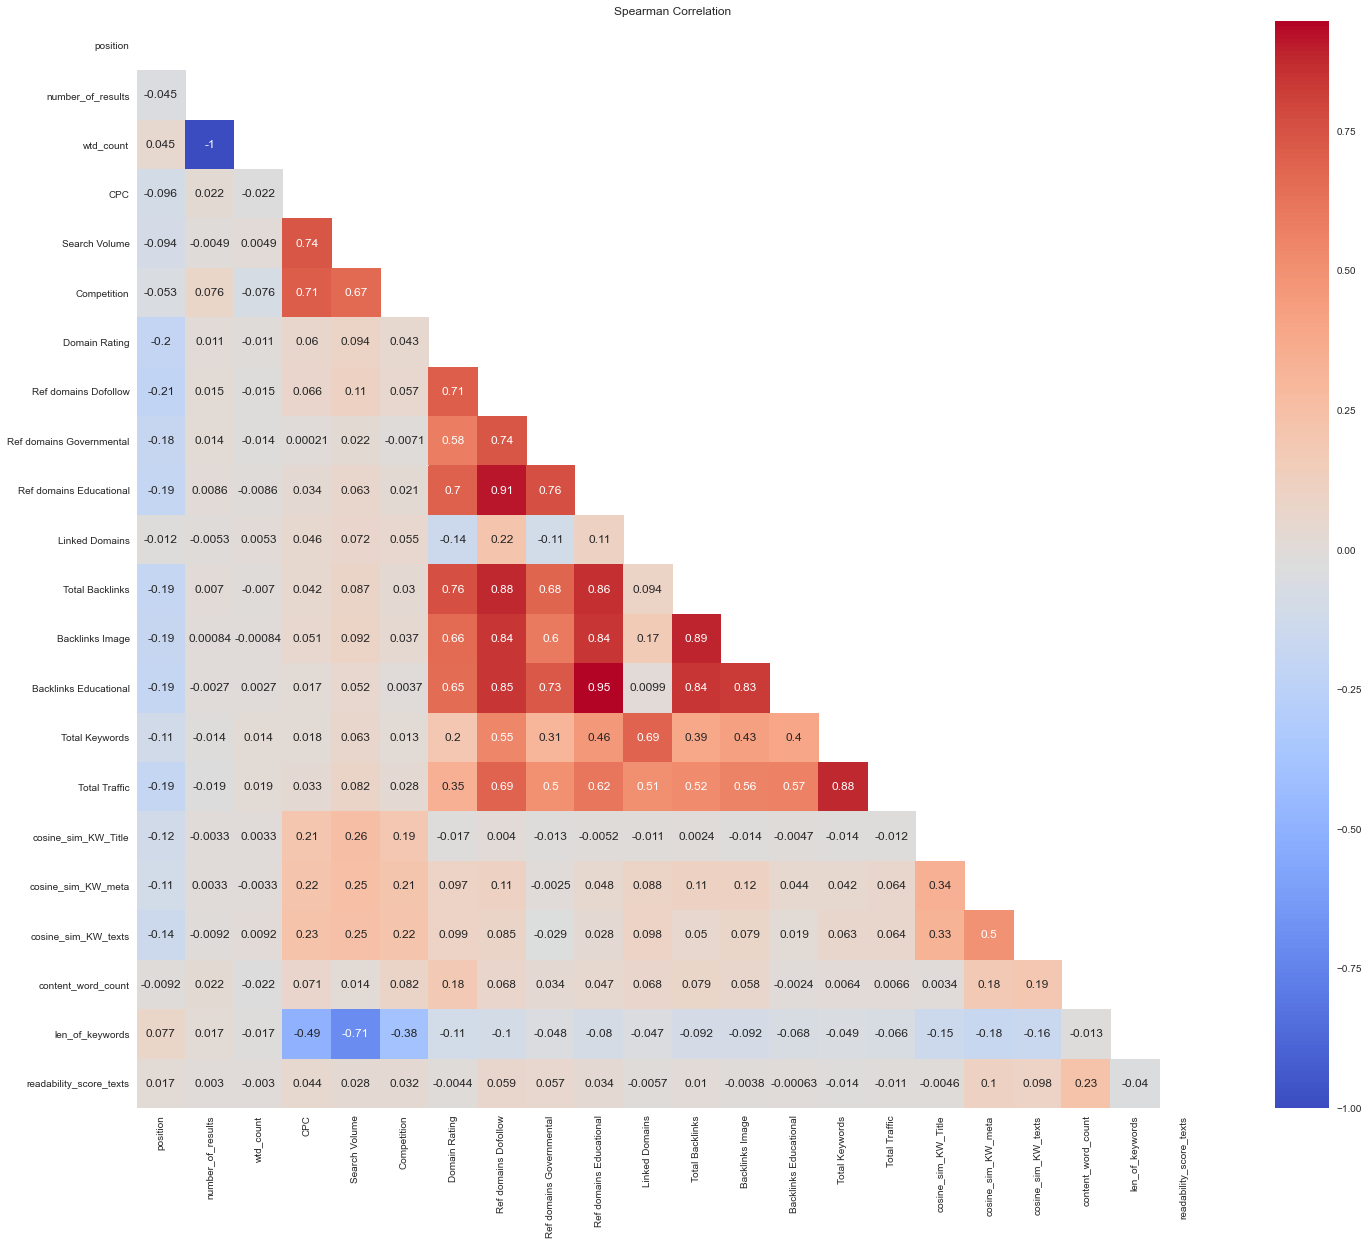

In [45]:
corr=new_df.corr(method='spearman')
mask=np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(24,20))
plt.title('Spearman Correlation')
sns.heatmap(corr, mask=mask,
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
new_df.head()

query               domain  \
0     abdominal abscesses         docpanel.com   
1     abdominal abscesses     cedars-sinai.org   
2  abdominal wall defects  aappublications.org   
3  abdominal wall defects  aappublications.org   
4  abdominal wall defects  columbiadoctors.org   

                                          sub_domain  position  \
0  https://www.docpanel.com/blog/post/abdominal-a...         6   
1  https://www.cedars-sinai.org/health-library/di...         7   
2  https://neoreviews.aappublications.org/content...         4   
3  https://pedsinreview.aappublications.org/conte...         5   
4  https://www.columbiadoctors.org/treatments-con...         9   

   number_of_results  wtd_count  \
0                  9   0.111111   
1                  9   0.111111   
2                  9   0.111111   
3                  9   0.111111   
4                  9   0.111111   

                                               title desc  CPC  Search Volume  \
0  Abdominal Abscess: Diagnosis, Causes & More - ...  NaN  0.0           2400   
1             Intra-Abdominal Abscess | Cedars-Sinai  NaN  0.0           2400   
2  Abdominal Wall Defects | American Academy of P...  NaN  0.0            260   
3  Ventral Abdominal Wall Defects | American Acad...  NaN  0.0            260   
4  ‚ÄãAbdominal Wall Defects (Pediatric) | Columb...  NaN  0.0            260   

   Competition                                               URLs  \
0         0.01  https://www.docpanel.com/blog/post/abdominal-a...   
1         0.01  https://www.cedars-sinai.org/health-library/di...   
2         0.01  https://neoreviews.aappublications.org/content...   
3         0.01  https://pedsinreview.aappublications.org/conte...   
4         0.01  https://www.columbiadoctors.org/treatments-con...   

                                            meta_tag  \
0  {'og:url': 'https://www.docpanel.com/blog/post...   
1  {'og:locale': 'en US', 'og:type': 'website', '...   
2  {'article:published_time': '2020 06 01', 'arti...   
3  {'article:published_time': '2019 12 01', 'arti...   
4  {'og:site_name': 'ColumbiaDoctors', 'og:type':...   

                                      link_canonical  \
0                                                  0   
1                                                  0   
2  https://neoreviews.aappublications.org/content...   
3  https://pedsinreview.aappublications.org/conte...   
4  https://www.columbiadoctors.org/treatments-con...   

                                             title.1  \
0          Abdominal Abscess: Diagnosis, Causes More   
1               Intra Abdominal Abscess Cedars Sinai   
2  Abdominal Wall Defects American Academy of Ped...   
3  Ventral Abdominal Wall Defects American Academ...   
4  Abdominal Wall Defects (Pediatric) ColumbiaDoc...   

                                           meta_desc  \
0  An abdominal abscess is a pocket of pus or inf...   
1  An intra abdominal abscess is a collection of ...   
2  The 2 most common congenital abdominal wall de...   
3  1. Sara A. Mansfield, MD, MS* 2. Tim Jancelewi...   
4  What are abdominal wall defects? Abdominal wal...   

                                            headings  \
0  ['Abdominal Abscess: Diagnosis, Causes More', ...   
1  ['Intra Abdominal Abscess', 'What is an intra ...   
2  ['Main menu', 'User menu', 'Search', 'Abdomina...   
3  ['Main menu', 'User menu', 'Search', 'Ventral ...   
4  ['Our website uses cookies', 'ColumbiaDoctors'...   

                                            img_alts  \
0  ['DocPanel', 'Facebook', 'Twitter', 'Tumblr', ...   
1  ['Cedars Sinai', 'Cedars Sinai Medical Center'...   
2  ['American Academy of Pediatrics', 'AAP Gatewa...   
3  ['American Academy of Pediatrics', 'AAP Gatewa...   
4  ['ColumbiaDoctors', 'A nurse putting on saniti...   

                                               texts  \
0  ['856.242.7343 For Patients For Healthcare Pro...   
1  ['Skip to content', "Menu Close Call 1 800 CED...   
2  ['Skip to main c

In [48]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7106 entries, 0 to 7105
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   query                     7106 non-null   object 
 1   domain                    7106 non-null   object 
 2   sub_domain                7100 non-null   object 
 3   position                  7106 non-null   int64  
 4   number_of_results         7106 non-null   int64  
 5   wtd_count                 7106 non-null   float64
 6   title                     7106 non-null   object 
 7   desc                      15 non-null     object 
 8   CPC                       7106 non-null   float64
 9   Search Volume             7106 non-null   int64  
 10  Competition               7106 non-null   float64
 11  URLs                      7086 non-null   object 
 12  meta_tag                  7086 non-null   object 
 13  link_canonical            7086 non-null   object 
 14  title.1 

In [362]:
new_df.iloc[:, np.r_[0,2,3,	4,	5,8,	9,	10,	23,24,	25,	26,	27,	28,	29,	30,	31,	32,	38,	39,40,	41,43]].head()

query                                         sub_domain  \
0     abdominal abscesses  https://www.docpanel.com/blog/post/abdominal-a...   
1     abdominal abscesses  https://www.cedars-sinai.org/health-library/di...   
2  abdominal wall defects  https://neoreviews.aappublications.org/content...   
3  abdominal wall defects  https://pedsinreview.aappublications.org/conte...   
4  abdominal wall defects  https://www.columbiadoctors.org/treatments-con...   

   position  number_of_results  wtd_count  CPC  Search Volume  Competition  \
0         6                  9   0.111111  0.0           2400         0.01   
1         7                  9   0.111111  0.0           2400         0.01   
2         4                  9   0.111111  0.0            260         0.01   
3         5                  9   0.111111  0.0            260         0.01   
4         9                  9   0.111111  0.0            260         0.01   

   Domain Rating  Ref domains Dofollow  Ref domains Governmental  \
0           31.0                     7                         0   
1           79.0                   446                         2   
2           88.0                   436                         2   
3           88.0                   436                         2   
4           67.0                   129                         0   

   Ref domains Educational  Linked Domains  Total Backlinks  Backlinks Image  \
0                        0               0              128               16   
1                        0               0            48999               52   
2                        0               0            46484              208   
3                        0               0            46484              208   
4                        5               0             7041              149   

   Backlinks Educational  Total Keywords  Total Traffic  cosine_sim_KW_Title  \
0                      0               0              0             0.175786   
1                      0               0              0             0.000000   
2                      0              23              9             0.524591   
3                      0              23              9             0.524591   
4                   1918               0              0             0.318784   

   cosine_sim_KW_meta  cosine_sim_KW_texts  content_word_count  \
0            0.220288             0.337328                1908   
1            0.116640             0.210826                3464   
2            0.265565             0.347571                3238   
3            0.260781             0.232662                3164   
4            0.610929             0.324561                1875   

   readability_score_texts  
0                     35.1  
1                     28.2  
2                      0.0  
3                      0.0  
4                     41.7

In [368]:
X=new_df.iloc[:, np.r_[0,2,3,	4,	5,8,	9,	10,	23,24,	25,	26,	27,	28,	29,	30,	31,	32,	38,	39,40,	41,43]]

In [365]:
X.columns

Index(['query', 'sub_domain', 'position', 'number_of_results', 'wtd_count',
       'CPC', 'Search Volume', 'Competition', 'Domain Rating',
       'Ref domains Dofollow', 'Ref domains Governmental',
       'Ref domains Educational', 'Linked Domains', 'Total Backlinks',
       'Backlinks Image', 'Backlinks Educational', 'Total Keywords',
       'Total Traffic', 'cosine_sim_KW_Title', 'cosine_sim_KW_meta',
       'cosine_sim_KW_texts', 'content_word_count', 'readability_score_texts'],
      dtype='object')

In [52]:
X=new_df.iloc[:, np.r_[3,	4,	5,8,	9,	10,	23,24,	25,	26,	27,	28,	29,	30,	31,	32,	38,	39,40,	41,43]]

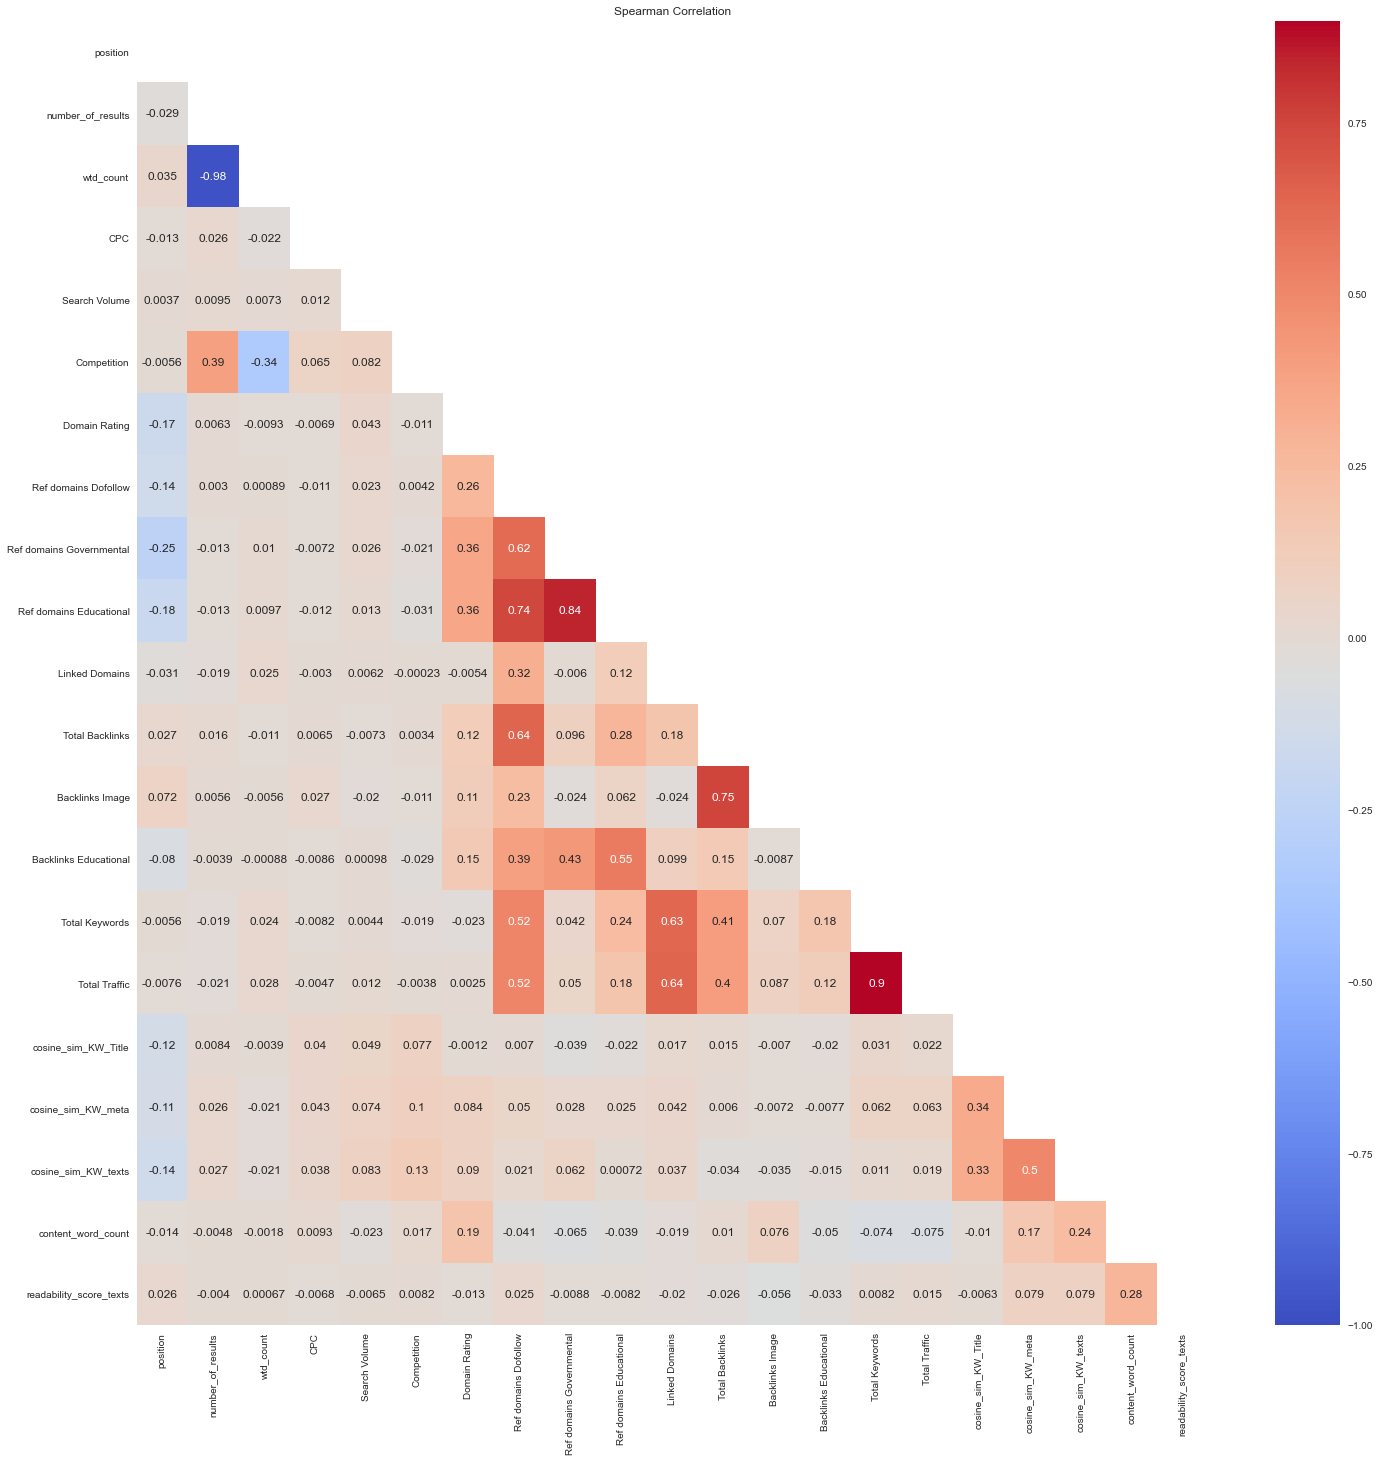

In [53]:
corr=X.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(24,24))
plt.title('Spearman Correlation')
sns.heatmap(corr, mask=mask,
            vmin=-1,
            cmap='coolwarm',
            annot=True);

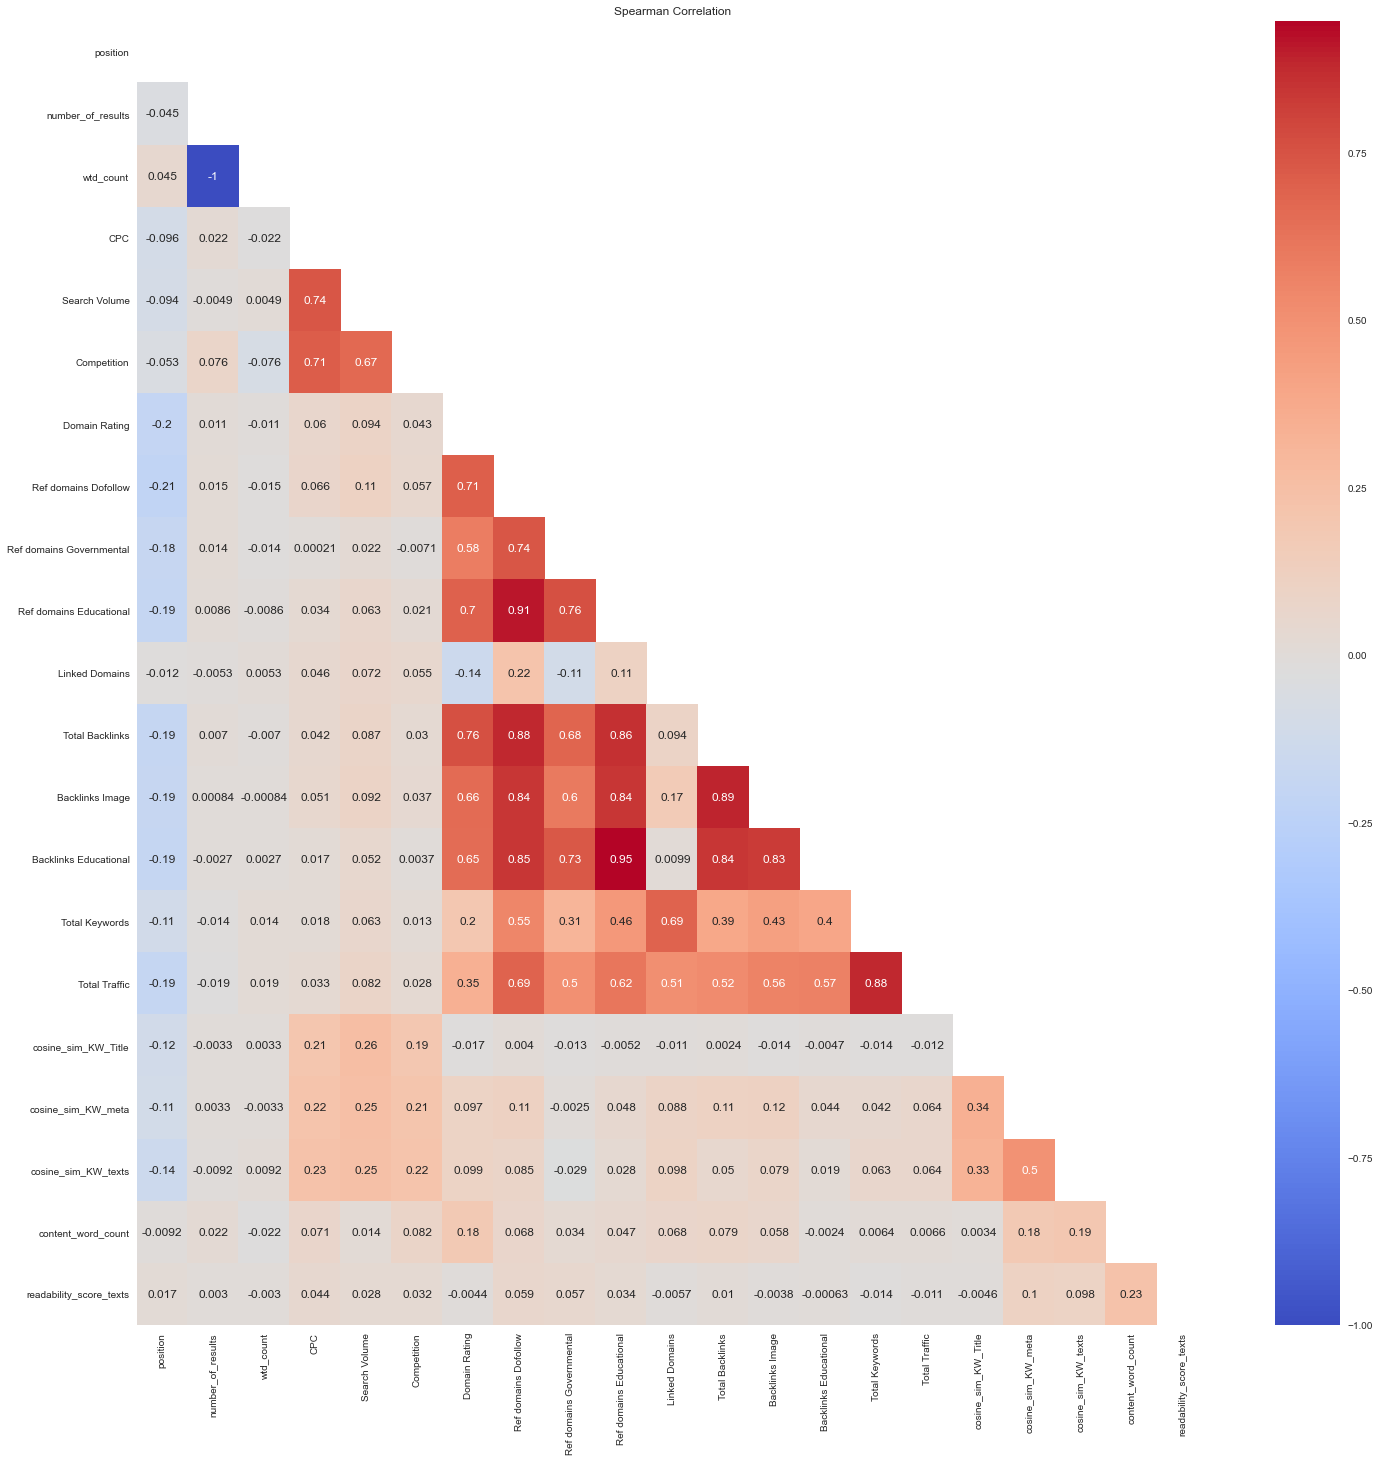

In [54]:
corr=X.corr(method='spearman')
mask=np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(24,24))
plt.title('Spearman Correlation')
sns.heatmap(corr, mask=mask,
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7106 entries, 0 to 7105
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   position                  7106 non-null   int64  
 1   number_of_results         7106 non-null   int64  
 2   wtd_count                 7106 non-null   float64
 3   CPC                       7106 non-null   float64
 4   Search Volume             7106 non-null   int64  
 5   Competition               7106 non-null   float64
 6   Domain Rating             7106 non-null   float64
 7   Ref domains Dofollow      7106 non-null   int64  
 8   Ref domains Governmental  7106 non-null   int64  
 9   Ref domains Educational   7106 non-null   int64  
 10  Linked Domains            7106 non-null   int64  
 11  Total Backlinks           7106 non-null   int64  
 12  Backlinks Image           7106 non-null   int64  
 13  Backlinks Educational     7106 non-null   int64  
 14  Total Ke

In [56]:
#X['no_of_links'] = X['no_of_links'].fillna(value=0)

In [57]:
X.head()

position  number_of_results  wtd_count  CPC  Search Volume  Competition  \
0         6                  9   0.111111  0.0           2400         0.01   
1         7                  9   0.111111  0.0           2400         0.01   
2         4                  9   0.111111  0.0            260         0.01   
3         5                  9   0.111111  0.0            260         0.01   
4         9                  9   0.111111  0.0            260         0.01   

   Domain Rating  Ref domains Dofollow  Ref domains Governmental  \
0           31.0                     7                         0   
1           79.0                   446                         2   
2           88.0                   436                         2   
3           88.0                   436                         2   
4           67.0                   129                         0   

   Ref domains Educational  Linked Domains  Total Backlinks  Backlinks Image  \
0                        0               0              128               16   
1                        0               0            48999               52   
2                        0               0            46484              208   
3                        0               0            46484              208   
4                        5               0             7041              149   

   Backlinks Educational  Total Keywords  Total Traffic  cosine_sim_KW_Title  \
0                      0               0              0             0.175786   
1                      0               0              0             0.000000   
2                      0              23              9             0.524591   
3                      0              23              9             0.524591   
4                   1918               0              0             0.318784   

   cosine_sim_KW_meta  cosine_sim_KW_texts  content_word_count  \
0            0.220288             0.337328                1908   
1            0.116640             0.210826                3464   
2            0.265565             0.347571                3238   
3            0.260781             0.232662                3164   
4            0.610929             0.324561                1875   

   readability_score_texts  
0                     35.1  
1                     28.2  
2                      0.0  
3                      0.0  
4                     41.7

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7106 entries, 0 to 7105
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   position                  7106 non-null   int64  
 1   number_of_results         7106 non-null   int64  
 2   wtd_count                 7106 non-null   float64
 3   CPC                       7106 non-null   float64
 4   Search Volume             7106 non-null   int64  
 5   Competition               7106 non-null   float64
 6   Domain Rating             7106 non-null   float64
 7   Ref domains Dofollow      7106 non-null   int64  
 8   Ref domains Governmental  7106 non-null   int64  
 9   Ref domains Educational   7106 non-null   int64  
 10  Linked Domains            7106 non-null   int64  
 11  Total Backlinks           7106 non-null   int64  
 12  Backlinks Image           7106 non-null   int64  
 13  Backlinks Educational     7106 non-null   int64  
 14  Total Ke

In [145]:
x=X.iloc[:, np.r_[3:21]]

In [146]:
y=X.iloc[:, 0]

In [147]:
# Linear Regression

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
x.head()

CPC  Search_Volume  Competition  Domain_Rating  Ref_domains_Dofollow  \
0  0.0           2400         0.01           31.0                     7   
1  0.0           2400         0.01           79.0                   446   
2  0.0            260         0.01           88.0                   436   
3  0.0            260         0.01           88.0                   436   
4  0.0            260         0.01           67.0                   129   

   Ref_domains_Governmental  Ref_domains_Educational  Linked_Domains  \
0                         0                        0               0   
1                         2                        0               0   
2                         2                        0               0   
3                         2                        0               0   
4                         0                        5               0   

   Total_Backlinks  Backlinks_Image  Backlinks_Educational  Total_Keywords  \
0              128               16                      0               0   
1            48999               52                      0               0   
2            46484              208                      0              23   
3            46484              208                      0              23   
4             7041              149                   1918               0   

   Total_Traffic  cosine_sim_KW_Title  cosine_sim_KW_meta  \
0              0             0.175786            0.220288   
1              0             0.000000            0.116640   
2              9             0.524591            0.265565   
3              9             0.524591            0.260781   
4              0             0.318784            0.610929   

   cosine_sim_KW_texts  content_word_count  readability_score_texts  
0             0.337328                1908                     35.1  
1             0.210826                3464                     28.2  
2             0.347571                3238                      0.0  
3             0.232662                3164                      0.0  
4             0.324561                1875                     41.7

In [150]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [151]:
x.columns.tolist()

['CPC',
 'Search_Volume',
 'Competition',
 'Domain_Rating',
 'Ref_domains_Dofollow',
 'Ref_domains_Governmental',
 'Ref_domains_Educational',
 'Linked_Domains',
 'Total_Backlinks',
 'Backlinks_Image',
 'Backlinks_Educational',
 'Total_Keywords',
 'Total_Traffic',
 'cosine_sim_KW_Title',
 'cosine_sim_KW_meta',
 'cosine_sim_KW_texts',
 'content_word_count',
 'readability_score_texts']

In [152]:
#Feature Importance
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular

In [153]:
# import sys
# !{sys.executable} -m pip install lime

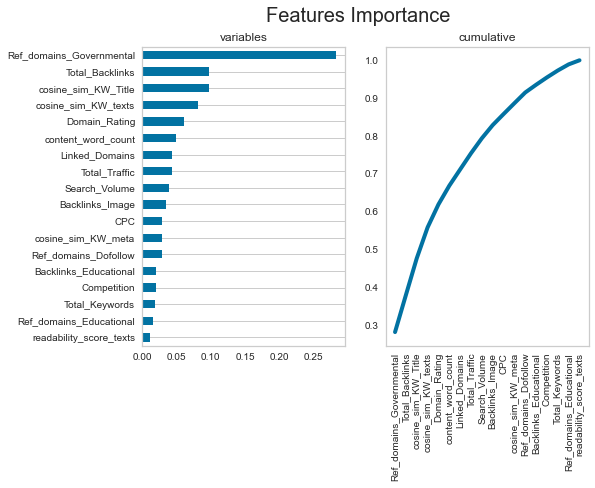

In [154]:
feature_names = x.columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(x,y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, "VARIABLE":feature_names}).sort_values("IMPORTANCE",ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')

dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), xticklabels=dtf_importances.index)
plt.xticks(rotation=90)
plt.grid(axis='both')
plt.show()

In [155]:
x.columns.to_list()

['CPC',
 'Search_Volume',
 'Competition',
 'Domain_Rating',
 'Ref_domains_Dofollow',
 'Ref_domains_Governmental',
 'Ref_domains_Educational',
 'Linked_Domains',
 'Total_Backlinks',
 'Backlinks_Image',
 'Backlinks_Educational',
 'Total_Keywords',
 'Total_Traffic',
 'cosine_sim_KW_Title',
 'cosine_sim_KW_meta',
 'cosine_sim_KW_texts',
 'content_word_count',
 'readability_score_texts']

In [156]:
x.rename({"Search Volume": "Search_Volume", "Domain Rating": "Domain_Rating", "Ref domains Dofollow": "Ref_domains_Dofollow",
           "Ref domains Governmental": "Ref_domains_Governmental",
           "Ref domains Educational": "Ref_domains_Educational",
          "Linked Domains": "Linked_Domains",
          "Total Backlinks": "Total_Backlinks",
          "Backlinks Image": "Backlinks_Image",
          "Backlinks Educational": "Backlinks_Educational",
           "Total Keywords": "Total_Keywords",
          "Total Traffic": "Total_Traffic",}, axis='columns', inplace =True)

In [157]:
X.rename({"Search Volume": "Search_Volume", "Domain Rating": "Domain_Rating", "Ref domains Dofollow": "Ref_domains_Dofollow",
           "Ref domains Governmental": "Ref_domains_Governmental",
           "Ref domains Educational": "Ref_domains_Educational",
          "Linked Domains": "Linked_Domains",
          "Total Backlinks": "Total_Backlinks",
          "Backlinks Image": "Backlinks_Image",
          "Backlinks Educational": "Backlinks_Educational",
           "Total Keywords": "Total_Keywords",
          "Total Traffic": "Total_Traffic",}, axis='columns', inplace =True)

In [158]:
x.head()

CPC  Search_Volume  Competition  Domain_Rating  Ref_domains_Dofollow  \
0  0.0           2400         0.01           31.0                     7   
1  0.0           2400         0.01           79.0                   446   
2  0.0            260         0.01           88.0                   436   
3  0.0            260         0.01           88.0                   436   
4  0.0            260         0.01           67.0                   129   

   Ref_domains_Governmental  Ref_domains_Educational  Linked_Domains  \
0                         0                        0               0   
1                         2                        0               0   
2                         2                        0               0   
3                         2                        0               0   
4                         0                        5               0   

   Total_Backlinks  Backlinks_Image  Backlinks_Educational  Total_Keywords  \
0              128               16                      0               0   
1            48999               52                      0               0   
2            46484              208                      0              23   
3            46484              208                      0              23   
4             7041              149                   1918               0   

   Total_Traffic  cosine_sim_KW_Title  cosine_sim_KW_meta  \
0              0             0.175786            0.220288   
1              0             0.000000            0.116640   
2              9             0.524591            0.265565   
3              9             0.524591            0.260781   
4              0             0.318784            0.610929   

   cosine_sim_KW_texts  content_word_count  readability_score_texts  
0             0.337328                1908                     35.1  
1             0.210826                3464                     28.2  
2             0.347571                3238                      0.0  
3             0.232662                3164                      0.0  
4             0.324561                1875                     41.7

In [159]:
exog=x.columns.to_list()

exog

['CPC',
 'Search_Volume',
 'Competition',
 'Domain_Rating',
 'Ref_domains_Dofollow',
 'Ref_domains_Governmental',
 'Ref_domains_Educational',
 'Linked_Domains',
 'Total_Backlinks',
 'Backlinks_Image',
 'Backlinks_Educational',
 'Total_Keywords',
 'Total_Traffic',
 'cosine_sim_KW_Title',
 'cosine_sim_KW_meta',
 'cosine_sim_KW_texts',
 'content_word_count',
 'readability_score_texts']

In [160]:
not_exog=['position']

In [161]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from sklearn.linear_model import LinearRegression

def sklearn_vif(exogs, data):

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif



import pandas as pd
import statsmodels.formula.api as smf

def get_vif(exogs, data):
    '''Return VIF (variance inflation factor) DataFrame

    Args:
    exogs (list): list of exogenous/independent variables
    data (DataFrame): the df storing all variables

    Returns:
    VIF and Tolerance DataFrame for each exogenous variable

    Notes:
    Assume we have a list of exogenous variable [X1, X2, X3, X4].
    To calculate the VIF and Tolerance for each variable, we regress
    each of them against other exogenous variables. For instance, the
    regression model for X3 is defined as:
                        X3 ~ X1 + X2 + X4
    And then we extract the R-squared from the model to calculate:
                    VIF = 1 / (1 - R-squared)
                    Tolerance = 1 - R-squared
    The cutoff to detect multicollinearity:
                    VIF > 10 or Tolerance < 0.1
    '''

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

In [162]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7106 entries, 0 to 7105
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   position                  7106 non-null   int64  
 1   number_of_results         7106 non-null   int64  
 2   wtd_count                 7106 non-null   float64
 3   CPC                       7106 non-null   float64
 4   Search_Volume             7106 non-null   int64  
 5   Competition               7106 non-null   float64
 6   Domain_Rating             7106 non-null   float64
 7   Ref_domains_Dofollow      7106 non-null   int64  
 8   Ref_domains_Governmental  7106 non-null   int64  
 9   Ref_domains_Educational   7106 non-null   int64  
 10  Linked_Domains            7106 non-null   int64  
 11  Total_Backlinks           7106 non-null   int64  
 12  Backlinks_Image           7106 non-null   int64  
 13  Backlinks_Educational     7106 non-null   int64  
 14  Total_Ke

In [163]:
get_vif(exogs=exog, data=X)

VIF  Tolerance
CPC                       1.007922   0.992140
Search_Volume             1.018624   0.981716
Competition               1.033840   0.967268
Domain_Rating             1.262507   0.792075
Ref_domains_Dofollow      7.829470   0.127723
Ref_domains_Governmental  5.020421   0.199186
Ref_domains_Educational   6.301469   0.158693
Linked_Domains            1.815053   0.550948
Total_Backlinks           7.509497   0.133165
Backlinks_Image           3.713773   0.269268
Backlinks_Educational     1.480394   0.675496
Total_Keywords            6.196037   0.161393
Total_Traffic             6.179970   0.161813
cosine_sim_KW_Title       1.206032   0.829165
cosine_sim_KW_meta        1.424342   0.702079
cosine_sim_KW_texts       1.500082   0.666630
content_word_count        1.260314   0.793453
readability_score_texts   1.110398   0.900578

In [373]:
X.to_excel('X.xlsx')

In [413]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7106 entries, 0 to 7105
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   query                     7106 non-null   object 
 1   sub_domain                7100 non-null   object 
 2   position                  7106 non-null   int64  
 3   number_of_results         7106 non-null   int64  
 4   wtd_count                 7106 non-null   float64
 5   CPC                       7106 non-null   float64
 6   Search Volume             7106 non-null   int64  
 7   Competition               7106 non-null   float64
 8   Domain Rating             7106 non-null   float64
 9   Ref domains Dofollow      7106 non-null   int64  
 10  Ref domains Governmental  7106 non-null   int64  
 11  Ref domains Educational   7106 non-null   int64  
 12  Linked Domains            7106 non-null   int64  
 13  Total Backlinks           7106 non-null   int64  
 14  Backlink

In [79]:
#Linear Regression

In [414]:
x=X.iloc[:, np.r_[3:23]]
y=X.iloc[:, 2]

In [387]:
y

0        6
1        7
2        4
3        5
4        9
5        6
6        9
7       10
8        3
9        5
10       7
11       8
12       9
13      10
14       1
15       2
16       6
17       6
18       7
19       8
20       6
21       9
22      10
23       7
24       7
25       7
26      10
27      10
28       5
29       7
30       9
31       5
32       9
33       4
34       9
35       6
36       3
37       4
38       7
39       9
40      10
41       9
42       5
43       7
44       4
45       7
46       5
47       9
48       1
49       7
50       3
51       6
52       3
53      10
54       8
55       4
56      10
57       9
58      10
59       1
60      10
61      10
62       7
63       8
64       6
65       7
66       7
67       8
68       9
69      10
70       1
71       4
72       5
73       6
74       8
75      10
76       5
77       3
78      10
79       9
80       5
81       6
82       7
83       2
84      10
85       4
86       5
87       3
88       6
89       7
90       9

In [415]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [416]:
import pandas as pd

cols = X_train.columns
sc = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns=cols)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns=cols)

In [379]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [380]:
model = lm.fit(X_train_sc, y_train)

In [381]:
predictions = lm.predict(X_test_sc)

In [382]:
print(f'alpha = {lm.intercept_}')
print(f'betas = {lm.coef_}')

alpha = 6.214486770501032
betas = [ 1.79823251e-01  2.85335573e-01 -2.33784084e-04  7.40700674e-02
  4.31525630e-02 -2.35761533e-01 -2.01812531e-01 -8.22508640e-01
  4.20375975e-01 -1.20116522e-01  7.12809770e-03  1.71297129e-01
  1.30275212e-02 -5.34510278e-02  2.01614488e-01 -2.62646823e-01
 -1.08790479e-01 -1.61551531e-01]


In [383]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions, squared=False)

2.4905581019447403

In [384]:
#RMSE
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, predictions, squared=False)))

1.578150215266196


In [385]:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))

MAE: 2.0798440592598264


In [308]:
from statsmodels.api import OLS
OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               position   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              1753.
Date:                Wed, 27 Oct 2021   Prob (F-statistic):                        0.00
Time:                        21:22:07   Log-Likelihood:                         -17629.
No. Observations:                7106   AIC:                                  3.529e+04
Df Residuals:                    7088   BIC:                                  3.542e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
CPC                          0.0002      0.004      0.058      0.954      -0.007       0.008
Search_Volume             3.781e-07   2.39e-07      1.579      0.114   -9.12e-08    8.47e-07
Competition                  0.8056      0.274      2.938      0.003       0.268       1.343
Domain_Rating                0.0661      0.001     48.448      0.000       0.063       0.069
Ref_domains_Dofollow     -2.908e-05    1.2e-05     -2.420      0.016   -5.26e-05   -5.52e-06
Ref_domains_Governmental    -0.0158      0.001    -12.175      0.000      -0.018      -0.013
Ref_domains_Educational      0.0008      0.000      1.891      0.059   -3.06e-05       0.002
Linked_Domains              -0.0002   6.77e-05     -2.471      0.013      -0.000   -3.46e-05
Total_Backlinks           1.971e-08   4.13e-08      0.477      0.633   -6.13e-08    1.01e-07
Backlinks_Image           5.881e-08   6.31e-08      0.932      0.351   -6.49e-08    1.82e-07
Backlinks_Educational     3.036e-06   1.69e-06      1.797      0.072   -2.76e-07    6.35e-06
Total_Keywords            7.364e-07   2.87e-07      2.570      0.010    1.75e-07     1.3e-06
Total_Traffic             1.072e-07    2.5e-07      0.428      0.669   -3.84e-07    5.98e-07
cosine_sim_KW_Title          0.7092      0.176      4.037      0.000       0.365       1.054
cosine_sim_KW_meta          -1.0133      0.250     -4.051      0.000      -1.504      -0.523
cosine_sim_KW_texts         -0.7755      0.246     -3.155      0.002      -1.257      -0.294
content_word_count           0.0003   3.56e-05      9.366      0.000       0.000       0.000
readability_score_texts      0.0103      0.001      8.153      0.000       0.008       0.013
==============================================================================
Omnibus:                       77.341   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.041
Skew:                          -0.027   Prob(JB):                     2.24e-11
Kurtosis:                       2.597   Cond. No.                     2.12e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [309]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print("MSE:", metrics.mean_squared_error(y_test, predictions, squared=False))
      
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
#RMSE
from sklearn import metrics
import numpy as np
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predictions, squared=False)))

MSE: 2.490108916332779
MAE: 2.07936866648697
RMSE: 1.5780078948892426


In [175]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7106 entries, 0 to 7105
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CPC                       7106 non-null   float64
 1   Search_Volume             7106 non-null   int64  
 2   Competition               7106 non-null   float64
 3   Domain_Rating             7106 non-null   float64
 4   Ref_domains_Dofollow      7106 non-null   int64  
 5   Ref_domains_Governmental  7106 non-null   int64  
 6   Ref_domains_Educational   7106 non-null   int64  
 7   Linked_Domains            7106 non-null   int64  
 8   Total_Backlinks           7106 non-null   int64  
 9   Backlinks_Image           7106 non-null   int64  
 10  Backlinks_Educational     7106 non-null   int64  
 11  Total_Keywords            7106 non-null   int64  
 12  Total_Traffic             7106 non-null   int64  
 13  cosine_sim_KW_Title       7106 non-null   float64
 14  cosine_s

In [177]:
x=x.iloc[:, np.r_[1:18]]

In [178]:
from statsmodels.api import OLS
OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               position   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              1856.
Date:                Wed, 27 Oct 2021   Prob (F-statistic):                        0.00
Time:                        16:31:26   Log-Likelihood:                         -17629.
No. Observations:                7106   AIC:                                  3.529e+04
Df Residuals:                    7089   BIC:                                  3.541e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Search_Volume             3.781e-07   2.39e-07      1.580      0.114   -9.11e-08    8.47e-07
Competition                  0.8065      0.274      2.947      0.003       0.270       1.343
Domain_Rating                0.0661      0.001     48.453      0.000       0.063       0.069
Ref_domains_Dofollow     -2.908e-05    1.2e-05     -2.420      0.016   -5.26e-05   -5.53e-06
Ref_domains_Governmental    -0.0158      0.001    -12.175      0.000      -0.018      -0.013
Ref_domains_Educational      0.0008      0.000      1.891      0.059   -3.07e-05       0.002
Linked_Domains              -0.0002   6.76e-05     -2.471      0.013      -0.000   -3.46e-05
Total_Backlinks           1.969e-08   4.13e-08      0.477      0.634   -6.13e-08    1.01e-07
Backlinks_Image            5.89e-08   6.31e-08      0.934      0.350   -6.47e-08    1.83e-07
Backlinks_Educational     3.036e-06   1.69e-06      1.797      0.072   -2.75e-07    6.35e-06
Total_Keywords            7.364e-07   2.87e-07      2.570      0.010    1.75e-07     1.3e-06
Total_Traffic             1.072e-07    2.5e-07      0.428      0.669   -3.84e-07    5.98e-07
cosine_sim_KW_Title          0.7094      0.176      4.040      0.000       0.365       1.054
cosine_sim_KW_meta          -1.0130      0.250     -4.050      0.000      -1.503      -0.523
cosine_sim_KW_texts         -0.7753      0.246     -3.155      0.002      -1.257      -0.294
content_word_count           0.0003   3.56e-05      9.367      0.000       0.000       0.000
readability_score_texts      0.0103      0.001      8.153      0.000       0.008       0.013
==============================================================================
Omnibus:                       77.337   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.037
Skew:                          -0.027   Prob(JB):                     2.25e-11
Kurtosis:                       2.597   Cond. No.                     2.12e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7106 entries, 0 to 7105
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Search_Volume             7106 non-null   int64  
 1   Competition               7106 non-null   float64
 2   Domain_Rating             7106 non-null   float64
 3   Ref_domains_Dofollow      7106 non-null   int64  
 4   Ref_domains_Governmental  7106 non-null   int64  
 5   Ref_domains_Educational   7106 non-null   int64  
 6   Linked_Domains            7106 non-null   int64  
 7   Total_Backlinks           7106 non-null   int64  
 8   Backlinks_Image           7106 non-null   int64  
 9   Backlinks_Educational     7106 non-null   int64  
 10  Total_Keywords            7106 non-null   int64  
 11  Total_Traffic             7106 non-null   int64  
 12  cosine_sim_KW_Title       7106 non-null   float64
 13  cosine_sim_KW_meta        7106 non-null   float64
 14  cosine_s

In [181]:
x=x.iloc[:, np.r_[0:11, 12:17]]

In [182]:
from statsmodels.api import OLS
OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               position   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              1973.
Date:                Wed, 27 Oct 2021   Prob (F-statistic):                        0.00
Time:                        16:32:43   Log-Likelihood:                         -17629.
No. Observations:                7106   AIC:                                  3.529e+04
Df Residuals:                    7090   BIC:                                  3.540e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Search_Volume             3.787e-07   2.39e-07      1.582      0.114   -9.05e-08    8.48e-07
Competition                  0.8078      0.274      2.953      0.003       0.271       1.344
Domain_Rating                0.0661      0.001     48.514      0.000       0.063       0.069
Ref_domains_Dofollow       -2.8e-05   1.17e-05     -2.384      0.017    -5.1e-05   -4.97e-06
Ref_domains_Governmental    -0.0157      0.001    -12.208      0.000      -0.018      -0.013
Ref_domains_Educational      0.0008      0.000      1.844      0.065   -4.97e-05       0.002
Linked_Domains              -0.0002   6.61e-05     -2.436      0.015      -0.000   -3.14e-05
Total_Backlinks           1.884e-08   4.13e-08      0.457      0.648   -6.21e-08    9.97e-08
Backlinks_Image           6.027e-08    6.3e-08      0.957      0.339   -6.32e-08    1.84e-07
Backlinks_Educational     3.013e-06   1.69e-06      1.784      0.074   -2.97e-07    6.32e-06
Total_Keywords            8.324e-07   1.78e-07      4.665      0.000    4.83e-07    1.18e-06
cosine_sim_KW_Title          0.7072      0.176      4.029      0.000       0.363       1.051
cosine_sim_KW_meta          -1.0112      0.250     -4.044      0.000      -1.501      -0.521
cosine_sim_KW_texts         -0.7766      0.246     -3.160      0.002      -1.258      -0.295
content_word_count           0.0003   3.55e-05      9.358      0.000       0.000       0.000
readability_score_texts      0.0103      0.001      8.161      0.000       0.008       0.013
==============================================================================
Omnibus:                       76.881   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.846
Skew:                          -0.028   Prob(JB):                     2.47e-11
Kurtosis:                       2.598   Cond. No.                     2.12e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [184]:
x=x.iloc[:, np.r_[0:7, 8:16]]

In [185]:
from statsmodels.api import OLS
OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               position   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              2104.
Date:                Wed, 27 Oct 2021   Prob (F-statistic):                        0.00
Time:                        16:34:03   Log-Likelihood:                         -17629.
No. Observations:                7106   AIC:                                  3.529e+04
Df Residuals:                    7091   BIC:                                  3.539e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Search_Volume             3.777e-07   2.39e-07      1.578      0.115   -9.14e-08    8.47e-07
Competition                  0.8085      0.274      2.955      0.003       0.272       1.345
Domain_Rating                0.0661      0.001     48.517      0.000       0.063       0.069
Ref_domains_Dofollow     -2.413e-05   8.15e-06     -2.963      0.003   -4.01e-05   -8.17e-06
Ref_domains_Governmental    -0.0159      0.001    -13.217      0.000      -0.018      -0.014
Ref_domains_Educational      0.0008      0.000      1.812      0.070   -6.31e-05       0.002
Linked_Domains              -0.0002   6.54e-05     -2.526      0.012      -0.000    -3.7e-05
Backlinks_Image           8.397e-08   3.56e-08      2.356      0.018    1.41e-08    1.54e-07
Backlinks_Educational     3.065e-06   1.68e-06      1.820      0.069   -2.37e-07    6.37e-06
Total_Keywords            8.411e-07   1.77e-07      4.742      0.000    4.93e-07    1.19e-06
cosine_sim_KW_Title          0.7083      0.175      4.037      0.000       0.364       1.052
cosine_sim_KW_meta          -1.0155      0.250     -4.065      0.000      -1.505      -0.526
cosine_sim_KW_texts         -0.7759      0.246     -3.158      0.002      -1.258      -0.294
content_word_count           0.0003   3.55e-05      9.348      0.000       0.000       0.000
readability_score_texts      0.0103      0.001      8.153      0.000       0.008       0.013
==============================================================================
Omnibus:                       76.951   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.882
Skew:                          -0.028   Prob(JB):                     2.43e-11
Kurtosis:                       2.597   Cond. No.                     9.07e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
x=x.iloc[:, np.r_[1:15]]

In [188]:
from statsmodels.api import OLS
OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               position   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              2254.
Date:                Wed, 27 Oct 2021   Prob (F-statistic):                        0.00
Time:                        16:35:41   Log-Likelihood:                         -17630.
No. Observations:                7106   AIC:                                  3.529e+04
Df Residuals:                    7092   BIC:                                  3.538e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Competition                  0.8382      0.273      3.071      0.002       0.303       1.373
Domain_Rating                0.0662      0.001     48.662      0.000       0.064       0.069
Ref_domains_Dofollow     -2.389e-05   8.15e-06     -2.933      0.003   -3.99e-05   -7.92e-06
Ref_domains_Governmental    -0.0159      0.001    -13.205      0.000      -0.018      -0.014
Ref_domains_Educational      0.0008      0.000      1.790      0.074   -7.27e-05       0.002
Linked_Domains              -0.0002   6.54e-05     -2.526      0.012      -0.000    -3.7e-05
Backlinks_Image           8.278e-08   3.56e-08      2.323      0.020    1.29e-08    1.53e-07
Backlinks_Educational     3.055e-06   1.68e-06      1.814      0.070   -2.47e-07    6.36e-06
Total_Keywords            8.393e-07   1.77e-07      4.731      0.000    4.92e-07    1.19e-06
cosine_sim_KW_Title          0.7102      0.175      4.047      0.000       0.366       1.054
cosine_sim_KW_meta          -1.0025      0.250     -4.014      0.000      -1.492      -0.513
cosine_sim_KW_texts         -0.7578      0.245     -3.087      0.002      -1.239      -0.277
content_word_count           0.0003   3.55e-05      9.280      0.000       0.000       0.000
readability_score_texts      0.0103      0.001      8.145      0.000       0.008       0.013
==============================================================================
Omnibus:                       76.782   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.850
Skew:                          -0.029   Prob(JB):                     2.47e-11
Kurtosis:                       2.598   Cond. No.                     9.07e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
x=x.iloc[:, np.r_[0:7,8:14]]

In [190]:
from statsmodels.api import OLS
OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               position   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              2426.
Date:                Wed, 27 Oct 2021   Prob (F-statistic):                        0.00
Time:                        16:36:15   Log-Likelihood:                         -17632.
No. Observations:                7106   AIC:                                  3.529e+04
Df Residuals:                    7093   BIC:                                  3.538e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Competition                  0.8341      0.273      3.055      0.002       0.299       1.369
Domain_Rating                0.0662      0.001     48.652      0.000       0.064       0.069
Ref_domains_Dofollow     -2.456e-05   8.14e-06     -3.018      0.003   -4.05e-05   -8.61e-06
Ref_domains_Governmental    -0.0161      0.001    -13.393      0.000      -0.018      -0.014
Ref_domains_Educational      0.0010      0.000      2.624      0.009       0.000       0.002
Linked_Domains              -0.0002   6.54e-05     -2.526      0.012      -0.000    -3.7e-05
Backlinks_Image           7.969e-08   3.56e-08      2.239      0.025    9.91e-09    1.49e-07
Total_Keywords            8.523e-07   1.77e-07      4.807      0.000    5.05e-07     1.2e-06
cosine_sim_KW_Title          0.7101      0.176      4.046      0.000       0.366       1.054
cosine_sim_KW_meta          -1.0111      0.250     -4.049      0.000      -1.501      -0.522
cosine_sim_KW_texts         -0.7518      0.245     -3.062      0.002      -1.233      -0.271
content_word_count           0.0003   3.55e-05      9.264      0.000       0.000       0.000
readability_score_texts      0.0102      0.001      8.102      0.000       0.008       0.013
==============================================================================
Omnibus:                       76.198   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.575
Skew:                          -0.030   Prob(JB):                     2.83e-11
Kurtosis:                       2.599   Cond. No.                     9.07e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [192]:
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [193]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print("MSE:", metrics.mean_squared_error(y_test, predictions, squared=False))
      
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
#RMSE
from sklearn import metrics
import numpy as np
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predictions, squared=False)))

MSE: 2.4944213118426974
MAE: 2.0817592483903486
RMSE: 1.5793737087347939


In [412]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7106 entries, 0 to 7105
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   query                     7106 non-null   object 
 1   sub_domain                7100 non-null   object 
 2   position                  7106 non-null   int64  
 3   number_of_results         7106 non-null   int64  
 4   wtd_count                 7106 non-null   float64
 5   CPC                       7106 non-null   float64
 6   Search Volume             7106 non-null   int64  
 7   Competition               7106 non-null   float64
 8   Domain Rating             7106 non-null   float64
 9   Ref domains Dofollow      7106 non-null   int64  
 10  Ref domains Governmental  7106 non-null   int64  
 11  Ref domains Educational   7106 non-null   int64  
 12  Linked Domains            7106 non-null   int64  
 13  Total Backlinks           7106 non-null   int64  
 14  Backlink

In [272]:
#Decision Tree Regression

In [345]:
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(X_train_sc, y_train)

DecisionTreeRegressor(random_state=0)

In [346]:
y_pred = regressor.predict(X_test_sc)

In [347]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

3.3401683815501704

In [348]:
#RMSE
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred, squared=False)))

1.827612754811634


In [349]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print("MSE:", metrics.mean_squared_error(y_test, y_pred, squared=False))
      
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
#RMSE
from sklearn import metrics
import numpy as np
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred, squared=False)))

MSE: 3.3401683815501704
MAE: 2.595385481148002
RMSE: 1.827612754811634


In [350]:
#Random Forest Regression

In [417]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [418]:
model = RandomForestRegressor()
model.fit(X_train_sc, y_train)

# Get the mean absolute error on the validation data
predicted_val = model.predict(X_test_sc)
MAE = mean_absolute_error(y_test , predicted_val)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  1.9823428089761799


In [419]:
mean_squared_error(y_test, predicted_val, squared=False)

2.439783229185742

In [420]:
#RMSE
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, predicted_val, squared=False)))

1.5619805469933812


In [421]:
X_train_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number_of_results         5329 non-null   float64
 1   wtd_count                 5329 non-null   float64
 2   CPC                       5329 non-null   float64
 3   Search Volume             5329 non-null   float64
 4   Competition               5329 non-null   float64
 5   Domain Rating             5329 non-null   float64
 6   Ref domains Dofollow      5329 non-null   float64
 7   Ref domains Governmental  5329 non-null   float64
 8   Ref domains Educational   5329 non-null   float64
 9   Linked Domains            5329 non-null   float64
 10  Total Backlinks           5329 non-null   float64
 11  Backlinks Image           5329 non-null   float64
 12  Backlinks Educational     5329 non-null   float64
 13  Total Keywords            5329 non-null   float64
 14  Total Tr

In [428]:
test=pd.read_excel("/Users/arvind.pawar/OneDrive - Brado/Desktop/NPI Data/test_data.xlsx")

In [429]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   query                     13 non-null     object 
 1   sub_domain                13 non-null     object 
 2   number_of_results         13 non-null     int64  
 3   wtd_count                 13 non-null     float64
 4   CPC                       13 non-null     int64  
 5   Search Volume             13 non-null     int64  
 6   Competition               13 non-null     float64
 7   Domain Rating             13 non-null     int64  
 8   Ref domains Dofollow      13 non-null     int64  
 9   Ref domains Governmental  13 non-null     int64  
 10  Ref domains Educational   13 non-null     int64  
 11  Linked Domains            13 non-null     int64  
 12  Total Backlinks           13 non-null     int64  
 13  Backlinks Image           13 non-null     int64  
 14  Backlinks Ed

In [430]:
test_df=test.iloc[:,2:22]

In [431]:
test_df

number_of_results  wtd_count  CPC  Search Volume  Competition  \
0                   9   0.111111    0           2400         0.01   
1                   9   0.111111    0           2400         0.01   
2                   9   0.111111    0            260         0.01   
3                   9   0.111111    0            260         0.01   
4                   9   0.111111    0            260         0.01   
5                   9   0.111111    0              0         0.00   
6                   9   0.111111    0              0         0.00   
7                   9   0.111111    0              0         0.00   
8                   9   0.111111    0             10         0.00   
9                   9   0.111111    0             10         0.00   
10                  9   0.111111    0              0         0.00   
11                  9   0.111111    0              0         0.00   
12                  9   0.111111    0              0         0.00   

    Domain Rating  Ref domains Dofollow  Ref domains Governmental  \
0              31                     7                         0   
1              79                   446                         2   
2              88                   436                         2   
3              88                   436                         2   
4              67                   129                         0   
5              88                   436                         2   
6              94                 15130                       186   
7              79                   446                         2   
8              44                    80                         0   
9              89                  1078                         0   
10             85                   727                         2   
11             85                   727                         2   
12             89                  1078                         0   

    Ref domains Educational  Linked Domains  Total Backlinks  Backlinks Image  \
0                         0               0              128               16   
1                         0               0            48999               52   
2                         0               0            46484              208   
3                         0               0            46484              208   
4                         5               0             7041              149   
5                         0               0            46484              208   
6                       503               0           575355            21195   
7                         0               0            48999               52   
8                         0               0              805              417   
9                         8             295            65049             2500   
10                        7               0            56057             2288   
11                        7               0            56057             2288   
12                        8             295            65049             2500   

    Backlinks Educational  Total Keywords  Total Traffic  cosine_sim_KW_Title  \
0                       0               0              0             0.175786   
1                       0               0              0             0.000000   
2                       0              23              9             0.524591   
3                       0              23              9             0.524591   
4                    1918               0              0             0.318784   
5                       0              23              9             0.304126   
6                   32375             405          14422             0.115216   
7                       0               0              0             0.510149   
8                       0               0              0             0.402982   
9                      35            2087            411             0.077809   
10                     52              14   

In [432]:
predicted_val = model.predict(test_df)

In [433]:
predicted_val

array([6.27, 5.53, 5.63, 5.58, 5.95, 5.39, 5.3 , 5.36, 6.52, 5.87, 5.17,
       5.18, 5.89])

In [394]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print("MSE:", metrics.mean_squared_error(y_test, predicted_val, squared=False))
      
print("MAE:", metrics.mean_absolute_error(y_test, predicted_val))
#RMSE
from sklearn import metrics
import numpy as np
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predicted_val, squared=False)))

MSE: 2.4548457706348534
MAE: 1.9984633232396316
RMSE: 1.5667947442581154


In [334]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_sc)

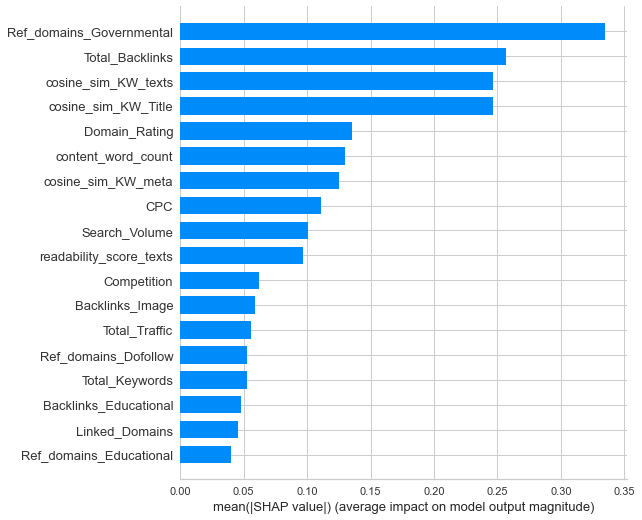

In [335]:
shap.summary_plot(shap_values, X_train_sc, plot_type="bar")

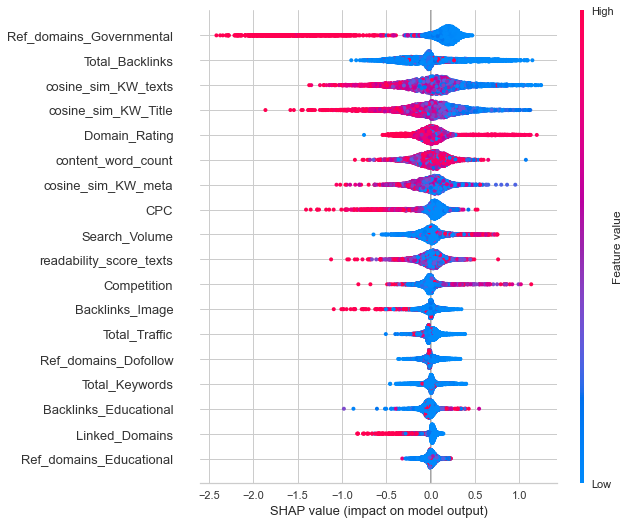

In [336]:
shap.summary_plot(shap_values, X_train_sc)

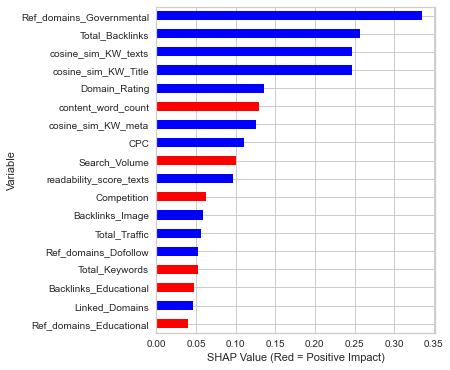

In [337]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X_train_sc) 

In [338]:
from sklearn.base import clone 

def drop_col_feat_imp(model, X_train_sc, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train_sc, y_train)
    benchmark_score = model_clone.score(X_train_sc, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train_sc.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train_sc.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train_sc.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train_sc.columns, importances)
    return importances_df

In [339]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df



# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

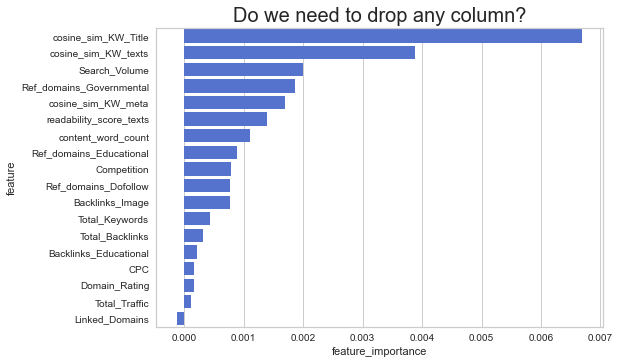

In [340]:
drop_imp = drop_col_feat_imp(model, X_train_sc, y_train, random_state=42)
var_imp_plot(drop_imp, 'Do we need to drop any column?')

In [356]:
#XGBoost
from xgboost import XGBRegressor

In [357]:
XGBModel = XGBRegressor()
XGBModel.fit(X_train_sc, y_train, verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_test_sc)
MAE = mean_absolute_error(y_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

XGBoost validation MAE =  2.058684780904431


In [358]:
mean_squared_error(y_test, XGBpredictions, squared=False)

2.5457645775474194

In [359]:
#RMSE
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, XGBpredictions, squared=False)))

1.5955452289256546


In [360]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print("MSE:", metrics.mean_squared_error(y_test, XGBpredictions, squared=False))
      
print("MAE:", metrics.mean_absolute_error(y_test, XGBpredictions))
#RMSE
from sklearn import metrics
import numpy as np
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, XGBpredictions, squared=False)))

MSE: 2.5457645775474194
MAE: 2.058684780904431
RMSE: 1.5955452289256546


In [366]:
X_test

CPC  Search_Volume  Competition  Domain_Rating  Ref_domains_Dofollow  \
2698    4.63             10         0.29           87.0                  1212   
2217    8.45            110         0.08           72.0                   156   
3985    0.00              0         0.00           78.0                   346   
4581    0.00              0         0.00           91.0                  2402   
2723    0.00              0         0.00           91.0                  4064   
2991    0.00              0         0.00           77.0                   556   
3127    4.50           3600         0.00           84.0                   894   
5080    0.00              0         0.00           74.0                   353   
4817    0.00              0         0.00           70.0                  3933   
1620    0.00              0         0.00           91.0                  4064   
462     0.00             10         0.13           85.0                   727   
3829    0.00              0         0.00           84.0                  1091   
6700    0.00           3600         0.00           82.0                   549   
1958    0.00              0         0.00           89.0                  1078   
3743    0.00              0         0.00           13.0                    53   
4714    0.00              0         0.00           91.0                  4064   
4719    0.00              0         0.00           89.0                  1078   
5562    0.00              0         0.00           90.0                  6335   
5712    1.25          49500         0.00           79.0                 15519   
4572    0.00             10         0.00           85.0                   727   
6031    0.77         135000         0.02           79.0                   446   
1961    4.43         246000         0.01           81.0                 23189   
5382    4.08         110000         0.22           94.0                 15130   
994     0.00            480         0.01           91.0                  4064   
6237    0.92         301000         0.05           94.0                 15130   
3391    0.00              0         0.00           81.0                  1173   
787     0.00              0         0.00           91.0                   755   
2487    0.00            140         0.27           77.0                   477   
3078    0.00              0         0.00           38.0                  3829   
420     0.00              0         0.00           42.0                   842   
6467    0.00              0         0.00           94.0                 15130   
2450    0.00              0         0.00           79.0                   446   
3204    0.79          27100         0.00           85.0                   882   
3234    0.00            390         0.01           33.0                   620   
5242    7.59           8100         0.01           70.0                  2252   
5062    0.00              0         0.00           85.0                   799   
6143    0.00              0         0.00           75.0                   489   
1882    0.00              0         0.00           81.0                   562   
2298    1.04           6600         0.00           92.0                  8986   
4424    0.50          60500         0.10           81.0                   929   
6445    0.00             10         0.01           76.0                    21   
4152    0.00            140         0.08           82.0                   549   
3964    2.93           2900         0.06           94.0                 15130   
6720    2.44            260         0.14           77.0                   439   
6233    0.52          33100         0.01           85.0                   727   
553     0.00            170         0.07           70.0                  2252   
325     0.00            260         0.00           94.0                 15130   
1827    0.00              0         0.00           52.0                    61   
3496    0.00              0         0.00

In [367]:
y_pred

array([3., 4., 6., ..., 7., 6., 6.])

In [206]:
# Deep Neural Network

In [207]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [208]:
# import sys
# !{sys.executable} -m pip install tensorflow

In [209]:
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [210]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               2944      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 167,809
Trainable params: 167,809
Non-trainable params: 0
_________________________________________________________________


In [211]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [212]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
134/134 [==============================] - 2s 5ms/step - loss: 428.3369 - mean_absolute_error: 428.3369 - val_loss: 168.8823 - val_mean_absolute_error: 168.8823

Epoch 00001: val_loss improved from inf to 168.88234, saving model to Weights-001--168.88234.hdf5
Epoch 2/500
134/134 [==============================] - 0s 2ms/step - loss: 89.2132 - mean_absolute_error: 89.2132 - val_loss: 123.5210 - val_mean_absolute_error: 123.5210

Epoch 00002: val_loss improved from 168.88234 to 123.52102, saving model to Weights-002--123.52102.hdf5
Epoch 3/500
134/134 [==============================] - 0s 2ms/step - loss: 56.2332 - mean_absolute_error: 56.2332 - val_loss: 30.8936 - val_mean_absolute_error: 30.8936

Epoch 00003: val_loss improved from 123.52102 to 30.89356, saving model to Weights-003--30.89356.hdf5
Epoch 4/500
134/134 [==============================] - 0s 2ms/step - loss: 13.6128 - mean_absolute_error: 13.6128 - val_loss: 5.5909 - val_mean_absolute_error: 5.5909

Epoch 00004:

In [213]:
import os
print(os.getcwd())

/Users/arvind.pawar/OneDrive - Brado/Desktop/Merck Manual Project


In [101]:
wights_file = '/Users/arvind.pawar/OneDrive - Brado/Desktop/Merck Manual Project/Weights-100--2.19416.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [102]:
predictions = NN_model.predict(X_test)

In [103]:
predictions

array([[6.020195 ],
       [7.0194607],
       [6.020195 ],
       ...,
       [5.3684616],
       [6.020195 ],
       [6.020195 ]], dtype=float32)

In [104]:
mean_squared_error(y_test, predictions, squared=False)

2.631946820760428

In [105]:
#RMSE
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, predictions, squared=False)))

1.6223275935397352
